# Empowering E-Commerce Sales with BI and Machine Learning Insights

## Dataset
The 'Brazilian E-Commerce Public Dataset by Olist' available on Kaggle, is a rich and comprehensive dataset capturing detailed information about customer orders on Olist, one of Brazil's largest e-commerce platforms. Spanning from 2016 to 2018, the dataset includes a variety of data points such as order statuses, product characteristics, customer demographics, payment details, and seller information. Additionally, it provides insights into shipping and logistics, including delivery performance and customer satisfaction through reviews and ratings.

This dataset is an invaluable resource for anyone interested in exploring the dynamics of e-commerce in Brazil. It offers ample opportunities for analysis in areas such as market trends, consumer behavior, and supply chain logistics. Researchers and data scientists can leverage this data to develop predictive models, optimize marketing strategies, and enhance customer service. The detailed nature of the dataset makes it suitable for a wide range of machine learning and data analysis projects, from basic descriptive analytics to advanced predictive modeling.

The Dataset can be found under this URL link. [Kaggle - Dataset](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

In [1]:
#!Install.package(tinytex)
#!pip install seaborn
#!pip install pandas
#!pip install nltk
#!pip install gensim
#!pip install keras
#!pip install wordcloud
#!pip install tensorflow
#!pip install statsmodels
#!pip install squarify
#!pip install imblearn
#!pip install xgboost
#!pip install deep_translator
#!pip install googletrans==4.0.0-rc1
#!pip install translate
#!pip install ipykernel
#!pip uninstall plotly
#!pip install plotly
#!pip install plotly_express==0.4.0
#!pip install pandas numpy nltk gensim scikit-learn spacy
#!pip install nltk spacy googletrans==4.0.0-rc1
#!python -m spacy download pt_core_news_sm
#pip install https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.5.0/pt_core_news_sm-3.5.0-py3-none-any.whl

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt
import squarify

# import plotly.express as px
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

from math import *
from math import pi

from deep_translator import GoogleTranslator
import random

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.backend import clear_session

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, roc_auc_score, roc_curve, f1_score
from sklearn.model_selection import cross_val_score


In [3]:
# Loading the Dataset
Customers = pd.read_csv("olist_customers_dataset.csv")
Geolocation = pd.read_csv("olist_geolocation_dataset.csv")
Order_Items = pd.read_csv("olist_order_items_dataset.csv")
Order_Payments = pd.read_csv("olist_order_payments_dataset.csv")
Order_Reviews = pd.read_csv("olist_order_reviews_dataset.csv")
Orders = pd.read_csv("olist_orders_dataset.csv")
Products = pd.read_csv("olist_products_dataset.csv")
Sellers = pd.read_csv("olist_sellers_dataset.csv")
Product_Category_Name_Translation = pd.read_csv("product_category_name_translation.csv")


print(Customers.head(5))
print(Geolocation.head(5))
print(Order_Items.head(5))
print(Order_Payments.head(5))
print(Order_Reviews.head(5))
print(Orders.head(5))
print(Products.head(5))
print(Sellers.head(5))
print(Product_Category_Name_Translation.head(5))

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                

In [4]:
print(Customers.columns)
print(Geolocation.columns)
print(Order_Items.columns)
print(Order_Payments.columns)
print(Order_Reviews.columns)
print(Orders.columns)
print(Products.columns)
print(Sellers.columns)
print(Product_Category_Name_Translation.columns)


Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Index(['product_id', 'prod

In [5]:
# Merging the Data stored in all the different tables
Complete_Data = Orders.merge(Order_Reviews, on='order_id')\
                   .merge(Order_Payments, on='order_id')\
                   .merge(Customers, on='customer_id')\
                   .merge(Order_Items, on='order_id')\
                   .merge(Products, on='product_id')\
                   .merge(Sellers, on='seller_id')\
                   .merge(Product_Category_Name_Translation, on='product_category_name')

# print(Complete_Data.head(5))

# Dropping duplicates
#Complete_Data = Complete_Data.drop_duplicates()

In [6]:
Complete_Data.duplicated().sum()

0

In [7]:
# Function for Summarizing the Entire Data
def Summarize(Data):
    print(f"Shape of Dataset: {Data.shape}")
    Summary = pd.DataFrame(Data.dtypes,columns=['dtypes'])
    Summary = Summary.reset_index()
    Summary['Column'] = Summary['index']
    Summary = Summary[['Column','dtypes']]
    Summary['# Missing'] = Data.isnull().sum().values
    Summary['# Unique'] = Data.nunique().values
    Summary['Example'] = Data.loc[0].values

    for col_name in Summary['Column'].value_counts().index:
        Summary.loc[Summary['Column'] == col_name, 'Entropy'] = round(stats.entropy(Data[col_name].value_counts(normalize=True), base=2),2)

    return Summary

# Reviewing Summary of the Entire Data
Summarize(Complete_Data)

Shape of Dataset: (115609, 40)


,Column,dtypes,# Missing,# Unique,Example,Entropy
0,order_id,object,0,96516,e481f51cbdc54678b7cc49136f2d6af7,16.41
1,customer_id,object,0,96516,9ef432eb6251297304e76186b10a928d,16.41
2,order_status,object,0,7,delivered,0.18
3,order_purchase_timestamp,object,0,95989,2017-10-02 10:56:33,16.40
4,order_approved_at,object,14,88332,2017-10-02 11:07:15,16.24
5,order_delivered_carrier_date,object,1195,79241,2017-10-04 19:55:00,16.00
6,order_delivered_customer_date,object,2400,93702,2017-10-10 21:25:13,16.37
7,order_estimated_delivery_date,object,0,449,2017-10-18 00:00:00,8.47
8,review_id,object,0,96319,a54f0611adc9ed256b57ede6b6eb5114,16.41
9,review_score,int64,0,5,4,1.77


## Dataset Cleaning and Preprocessing

Data cleaning and preprocessing are critical steps when working with the Brazilian E-Commerce Public Dataset by Olist. This process involves handling missing values, correcting inconsistencies, and transforming data into a suitable format for analysis. Key tasks include normalizing text fields, converting dates to standard formats, and dealing with outliers in numerical columns. Additionally, merging various tables to create a cohesive dataset is essential for comprehensive analysis. Effective preprocessing ensures the dataset's quality and reliability, enabling accurate and insightful data exploration and modeling.

[Kaggle Implementation Example 1](https://www.kaggle.com/code/dager234/market-basket-rfm-analysis)

[Kaggle Implementation Example 2](https://www.kaggle.com/code/rekhasuresh/brazilian-ecommerce)

[Kaggle Implementation Example 3](https://www.kaggle.com/code/adielapena/brazilian-e-commerce-analysis)

[Kaggle Implementation Example 4](https://www.kaggle.com/code/taylorsamarel/e-commerce-customer-satisfaction-analysis)


In [8]:
Complete_Data.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             101808
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0


In [9]:
Complete_Data.dropna(subset= ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [10]:
# Changing Datatype for all 8 Timestamp columns
Timestamp = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                    'order_delivered_customer_date','order_estimated_delivery_date', 'review_creation_date',
                    'review_answer_timestamp', 'shipping_limit_date']
Complete_Data[Timestamp] = Complete_Data[Timestamp].apply(pd.to_datetime)

In [11]:
# Renaming 2 Columns - Corrections
Complete_Data = Complete_Data.rename(columns = {'product_name_lenght': 'product_name_length',
                                   'product_description_lenght': 'product_description_length'
                                  })

In [12]:
Complete_Data.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                    0
order_delivered_carrier_date         0
order_delivered_customer_date        0
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             99701
review_comment_message           65835
review_creation_date                 0
review_answer_timestamp              0
payment_sequential                   0
payment_type                         0
payment_installments                 0
payment_value                        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state                       0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date      

In [13]:
print(Complete_Data.seller_id)
print(Complete_Data.customer_id)
print(Complete_Data.order_id)
print(Complete_Data.customer_unique_id)

0         3504c0cb71d7fa48d967e0e4c94d59d9
1         3504c0cb71d7fa48d967e0e4c94d59d9
2         3504c0cb71d7fa48d967e0e4c94d59d9
3         289cdb325fb7e7f891c38608bf9e0962
4         4869f7a5dfa277a7dca6462dcf3b52b2
                        ...               
115604    1f9ab4708f3056ede07124aad39a2554
115605    d50d79cb34e38265a8649c383dcffd48
115606    a1043bafd471dff536d0c462352beb48
115607    a1043bafd471dff536d0c462352beb48
115608    ececbfcff9804a2d6b40f589df8eef2b
Name: seller_id, Length: 113194, dtype: object
0         9ef432eb6251297304e76186b10a928d
1         9ef432eb6251297304e76186b10a928d
2         9ef432eb6251297304e76186b10a928d
3         b0830fb4747a6c6d20dea0b8c802d7ef
4         41ce2a54c0b03bf3443c3d931a367089
                        ...               
115604    1fca14ff2861355f6e5f14306ff977a7
115605    1aa71eb042121263aafbe80c1b562c9c
115606    b331b74b18dc79bcdf6532d51e1637c1
115607    b331b74b18dc79bcdf6532d51e1637c1
115608    edb027a75a1449115f6b43211ae02a24
Name: c

In [14]:

# Encoding of Categorical Variables
le = LabelEncoder()
Complete_Data['seller_id'] = le.fit_transform(Complete_Data['seller_id'])
Complete_Data['customer_id'] = le.fit_transform(Complete_Data['customer_id'])
Complete_Data['customer_unique_id'] = le.fit_transform(Complete_Data['customer_unique_id'])
Complete_Data['order_id'] = le.fit_transform(Complete_Data['order_id'])

print(Complete_Data.seller_id)
print(Complete_Data.customer_id)
print(Complete_Data.order_id)
print(Complete_Data.customer_unique_id)

0          602
1          602
2          602
3          454
4          818
          ... 
115604     354
115605    2424
115606    1842
115607    1842
115608    2694
Name: seller_id, Length: 113194, dtype: int32
0         58720
1         58720
2         58720
3         65319
4         24294
          ...  
115604    11777
115605     9876
115606    66316
115607    66316
115608    87868
Name: customer_id, Length: 113194, dtype: int32
0         84535
1         84535
2         84535
3         30909
4         26361
          ...  
115604    36694
115605    48472
115606     6631
115607     6631
115608    37912
Name: order_id, Length: 113194, dtype: int32
0         44466
1         44466
2         44466
3         62663
4         20949
          ...  
115604    78164
115605    41351
115606    28887
115607    28887
115608    34508
Name: customer_unique_id, Length: 113194, dtype: int32


In [15]:
# Classifying 71 Product Categories Under 9 Main Categories
def Classifying_PC(category):

    if category in ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture', 'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery']:
        return 'Furniture'

    elif category in ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics', 'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services']:
        return 'Electronics'

    elif category in ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff', ]:
        return 'Fashion'

    elif category in ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools', 'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place']:
        return 'Home & Garden'

    elif category in ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art']:
        return 'Entertainment'

    elif category in ['health_beauty', 'perfumery', 'diapers_and_hygiene']:
        return 'Beauty & Health'

    elif category in ['food_drink', 'drinks', 'food']:
        return 'Food & Drinks'

    elif category in ['books_general_interest', 'books_technical', 'books_imported', 'stationery']:
        return 'Books & Stationery'

    elif category in ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']:
        return 'Industry & Construction'

Complete_Data['product_category'] = Complete_Data.product_category_name_english.apply(Classifying_PC)
Complete_Data.product_category.value_counts()
#Summarize(Complete_Data)

product_category
Electronics                29568
Furniture                  28050
Entertainment              13507
Beauty & Health            13283
Home & Garden              12848
Fashion                     9723
Books & Stationery          3427
Industry & Construction     1633
Food & Drinks               1155
Name: count, dtype: int64

In [16]:
# Customers Repurchase Intentions

Total_Purchases = Complete_Data['customer_id'].nunique()
print(f"Total purchases: {Total_Purchases}")

# Counting Occurrences of each unique customer_unique_id
Repeated_Customers = Complete_Data.groupby('customer_unique_id').size().reset_index(name='purchases')

# Filtering Customers with more than 1 purchase, and arranging in Descending Order of Purchases
Repeated_Customers = Repeated_Customers[Repeated_Customers['purchases'] > 1].sort_values(by='purchases', ascending=False)

# Displaying the first few rows of Repeated_Customers
print("\nRepeated_Customers dataset:")
print(Repeated_Customers.head())

# Calculating Total Purchases made by Repeated Customers
Total_Repeated_Customers = Repeated_Customers['purchases'].sum()

# Calculate repeat customer share as a percentage
Repeated_Share = (Total_Repeated_Customers / Total_Purchases) * 100

print(f"\nTotal Repeated Customers: {Total_Repeated_Customers}")
print(f"Repeated Customer Share: {Repeated_Share:.2f}%")

Total purchases: 94472

Repeated_Customers dataset:
       customer_unique_id  purchases
55231               55231         75
40002               40002         38
89272               89272         35
31031               31031         26
78424               78424         24

Total Repeated Customers: 35463
Repeated Customer Share: 37.54%


In [17]:
# Getting Duration of the Package to Reach from Seller to Carrier
Complete_Data['Seller_to_Carrier_Status'] = (Complete_Data['shipping_limit_date'] - 
                                             Complete_Data['order_delivered_carrier_date']).dt.days

# Classifying the above calculated status into Either an 'On-Time/Early' Delivery or 'Late' Delivery
Complete_Data['Seller_to_Carrier_Status'] = Complete_Data['Seller_to_Carrier_Status'].apply(lambda x: 
                                                                                            'OnTime/Early' if x >= 0 else 'Late')

# Calculating the Difference Between Estimated Delivery and Actual Delivery
Complete_Data['Arrival_Status'] = (Complete_Data['order_estimated_delivery_date'] 
                                   - Complete_Data['order_delivered_customer_date']).dt.days

# Classifying the above calculated status into Either an 'On-Time/Early' Delivery or 'Late' Delivery
Complete_Data['Arrival_Status'] = Complete_Data['Arrival_Status'].apply(lambda x: 'OnTime/Early' if x >= 0 else 'Late')

In [18]:
# Calculating Arrival, Estimated and Shipping Days
Complete_Data['Arrival_Days'] = (Complete_Data['order_delivered_customer_date'] - 
                                 Complete_Data['order_purchase_timestamp']).dt.days
Complete_Data['Estimated_Days'] = (Complete_Data['order_estimated_delivery_date'] - 
                                   Complete_Data['order_purchase_timestamp']).dt.days
Complete_Data['Shipping_Days'] = (Complete_Data['order_delivered_customer_date'] - 
                                  Complete_Data['order_delivered_carrier_date']).dt.days

# Incase there are NEGATIVE Values for Shipping_Days variable
if 'Shipping_Days' in Complete_Data.columns:
    Negative_Shipping_Days = Complete_Data[['order_delivered_carrier_date', 
                                            'order_delivered_customer_date']][Complete_Data.Shipping_Days < 0].index
    
    Complete_Data.drop(Negative_Shipping_Days, inplace=True)

min(Complete_Data.Shipping_Days)
Summarize(Complete_Data)
Complete_Data.head()

Shape of Dataset: (113136, 46)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,Seller_to_Carrier_Status,Arrival_Status,Arrival_Days,Estimated_Days,Shipping_Days
0,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,9350,maua,SP,housewares,Home & Garden,OnTime/Early,OnTime/Early,8,15,6
1,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,9350,maua,SP,housewares,Home & Garden,OnTime/Early,OnTime/Early,8,15,6
2,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,9350,maua,SP,housewares,Home & Garden,OnTime/Early,OnTime/Early,8,15,6
3,30909,65319,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,31570,belo horizonte,SP,perfumery,Beauty & Health,OnTime/Early,OnTime/Early,13,19,12
4,26361,24294,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,14840,guariba,SP,auto,Electronics,OnTime/Early,OnTime/Early,9,26,9


In [19]:
Complete_Data[['Arrival_Days', 'Estimated_Days', 'Shipping_Days']].describe()

,Arrival_Days,Estimated_Days,Shipping_Days
count,113136.000000,113136.000000,113136.000000
mean,11.979591,23.469974,8.721247
std,9.362945,8.825507,8.537953
min,0.000000,2.000000,0.000000
25%,6.000000,18.000000,4.000000
50%,10.000000,23.000000,7.000000
75%,15.000000,28.000000,11.000000
max,208.000000,155.000000,205.000000


In [20]:
# Removing Outliers from (More than 60 Days)
Outliers = Complete_Data[(Complete_Data.Arrival_Days > 60) | (Complete_Data.Estimated_Days > 60) | (Complete_Data.Shipping_Days > 60)].index

Complete_Data.drop(Outliers, inplace= True)
Complete_Data.reset_index(inplace= True, drop= True)

In [21]:
# Categorizing Delivery Time into 3 Categories Based on the No. of Days it was deliverted in: (Fast, Neutral, Slow)

def Delivery_Category(Days):
    if Days in range(0, 16):
        return 'Fast'
    elif Days in range(16, 30):
        return 'Normal'
    else:
        return 'Slow'

Complete_Data['Arrival_Delivery_Cat'] = Complete_Data.Arrival_Days.apply(Delivery_Category)
Complete_Data['Estimated_Delivery_Cat'] = Complete_Data.Estimated_Days.apply(Delivery_Category)
Complete_Data['Shipping_Delivery_Cat'] = Complete_Data.Shipping_Days.apply(Delivery_Category)

Complete_Data[['Arrival_Delivery_Cat', 'Estimated_Delivery_Cat', 'Shipping_Delivery_Cat']].describe()

,Arrival_Delivery_Cat,Estimated_Delivery_Cat,Shipping_Delivery_Cat
count,112568,112568,112568
unique,3,3,3
top,Fast,Normal,Fast
freq,86312,70238,98040


In [22]:
# Encoding Review Scores into Categories: Satisfied, Neutral or Dissatisfied on Complete Data
score_mapping = {1: 'Dissatisfied', 2: 'Dissatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
Complete_Data['review_category'] = Complete_Data['review_score'].map(score_mapping)
Complete_Data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_category,Seller_to_Carrier_Status,Arrival_Status,Arrival_Days,Estimated_Days,Shipping_Days,Arrival_Delivery_Cat,Estimated_Delivery_Cat,Shipping_Delivery_Cat,review_category
0,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,Home & Garden,OnTime/Early,OnTime/Early,8,15,6,Fast,Fast,Fast,Satisfied
1,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,Home & Garden,OnTime/Early,OnTime/Early,8,15,6,Fast,Fast,Fast,Satisfied
2,84535,58720,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,Home & Garden,OnTime/Early,OnTime/Early,8,15,6,Fast,Fast,Fast,Satisfied
3,30909,65319,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,Beauty & Health,OnTime/Early,OnTime/Early,13,19,12,Fast,Normal,Fast,Satisfied
4,26361,24294,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,Electronics,OnTime/Early,OnTime/Early,9,26,9,Fast,Normal,Fast,Satisfied


In [23]:
# Now Looking at Customer Reviews and Rating Score
Reviews_Data = Complete_Data[['review_comment_message', 'review_score']]
Reviews_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112568 entries, 0 to 112567
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   review_comment_message  46995 non-null   object
 1   review_score            112568 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [24]:
# Dropping missing values
Reviews_Data.dropna(inplace= True)

# Rename columns for ease
# Reviews_Data.rename(columns = {'review_comment_message' : 'message', 'review_score' : 'score'}, inplace= True)

# Reset index
Reviews_Data.reset_index(inplace= True, drop= True)
Reviews_Data.isnull().sum()
Reviews_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46995 entries, 0 to 46994
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   review_comment_message  46995 non-null  object
 1   review_score            46995 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.4+ KB


C:\Users\pc\AppData\Local\Temp\ipykernel_17464\2432528237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reviews_Data.dropna(inplace= True)


In [25]:
# Encoding Review Scores into Categories: Satisfied, Neutral or Dissatisfied on Complete Data
score_mapping = {1: 'Dissatisfied', 2: 'Dissatisfied', 3: 'Neutral', 4: 'Satisfied', 5: 'Satisfied'}
Reviews_Data['review_category'] = Reviews_Data['review_score'].map(score_mapping)
Reviews_Data.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\947752947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reviews_Data['review_category'] = Reviews_Data['review_score'].map(score_mapping)


,review_comment_message,review_score,review_category
0,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied
1,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied
2,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied
3,Muito bom o produto.,4,Satisfied
4,O produto foi exatamente o que eu esperava e e...,5,Satisfied


In [26]:
Complete_Data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english',
       'product_category', 'Seller_to_Carrier_Status'

## Exploratory Data Analysis (EDA)

Analyzing the Brazilian E-Commerce Public Dataset by Olist is essential for understanding the dynamics of online retail in Brazil. By examining various metrics such as repurchase intention, delivery performance, and seller profiles, we can gain valuable insights into customer behavior and satisfaction. This analysis helps in identifying the factors that influence repeat purchases, which is crucial for customer retention strategies. Additionally, evaluating the relationship between delivery performance and customer satisfaction can highlight areas for logistical improvements. Furthermore, analyzing seller profiles in relation to product quality can generate accurate predictions, assisting in quality control and enhancing the overall shopping experience. These insights are vital for businesses aiming to optimize their operations and build stronger customer relationships.

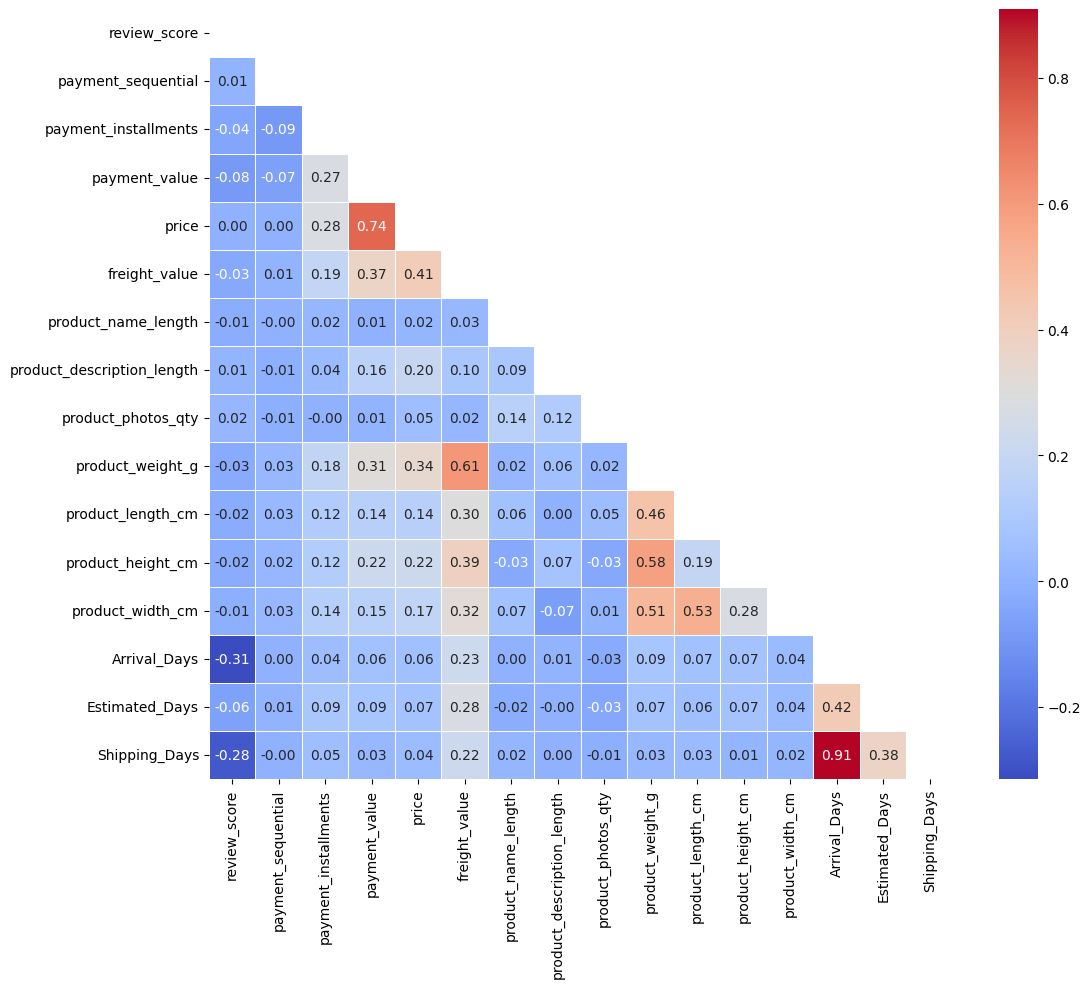

In [27]:

# Calculating Correlation btw the Numerical Variables
Num_Variables = ['review_score', 'payment_sequential', 'payment_installments', 'payment_value',
                   'price', 'freight_value', 'product_name_length', 'product_description_length',
                   'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm',
                   'product_width_cm', 'Arrival_Days', 'Estimated_Days', 'Shipping_Days']

Num_Data = Complete_Data[Num_Variables]
Corr_Num_Variables = Num_Data.corr()

# Plotting of Heatmap for Correlation Between Numerical Variables of the Dataset
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(Corr_Num_Variables, dtype=bool))
sns.heatmap(Corr_Num_Variables, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
#plt.title('Correlation Plot (Correlogram)')
plt.show()


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the

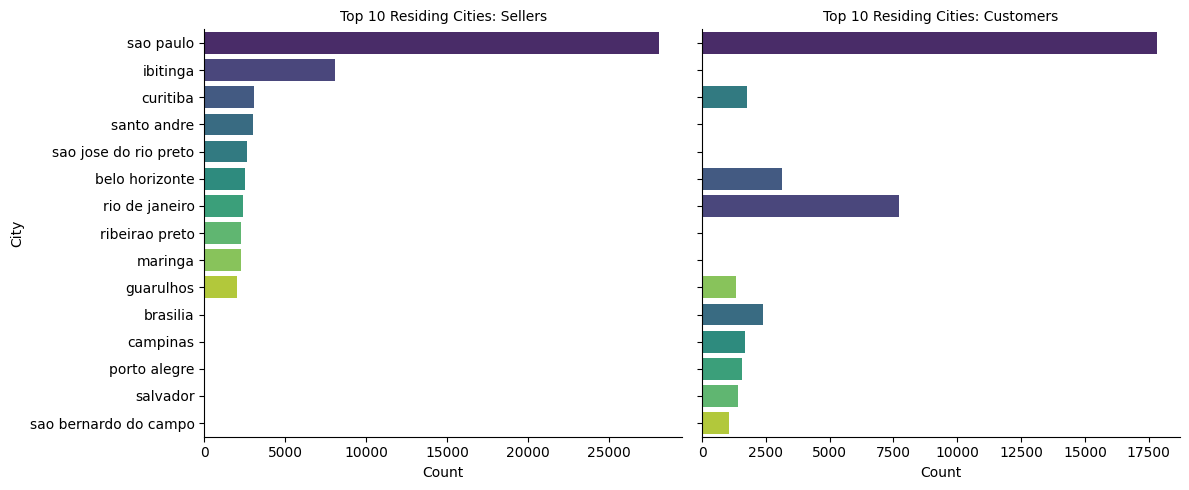

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the

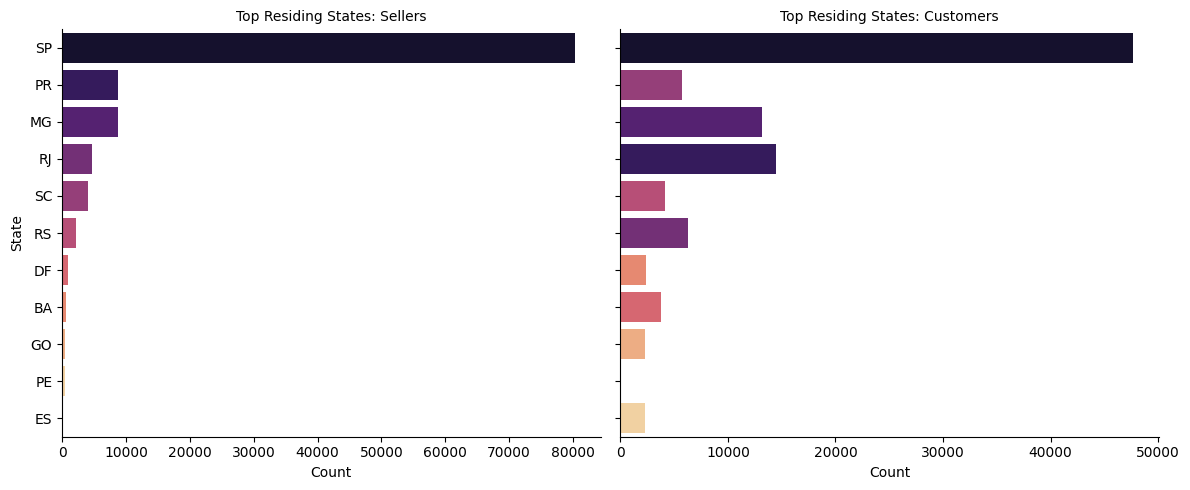

In [28]:
# TOP 10 Residing Cities and States for Sellers and Customers

# Calculating the Top 10 Cities and States By using Seller and Customer Count
Top_Seller_Cities = Complete_Data['seller_city'].value_counts().head(10)
Top_Seller_States = Complete_Data['seller_state'].value_counts().head(10)
Top_Customer_Cities = Complete_Data['customer_city'].value_counts().head(10)
Top_Customer_States = Complete_Data['customer_state'].value_counts().head(10)

# Visualization
Seller_Cities_df = pd.DataFrame({
    'City': Top_Seller_Cities.index,
    'Count': Top_Seller_Cities.values,
    'Type': 'Sellers'
})

Seller_States_df = pd.DataFrame({
    'State': Top_Seller_States.index,
    'Count': Top_Seller_States.values,
    'Type': 'Sellers'
})

Customer_Cities_df = pd.DataFrame({
    'City': Top_Customer_Cities.index,
    'Count': Top_Customer_Cities.values,
    'Type': 'Customers'
})

Customer_States_df = pd.DataFrame({
    'State': Top_Customer_States.index,
    'Count': Top_Customer_States.values,
    'Type': 'Customers'
})

# Concatinating Seller and Customer Data
States_df = pd.concat([Seller_States_df, Customer_States_df], axis=0)
Cities_df = pd.concat([Seller_Cities_df, Customer_Cities_df], axis=0)


g_cities = sns.FacetGrid(Cities_df, col="Type", height=5, aspect=1.2, sharex=False)
g_cities.map(sns.barplot, "Count", "City", palette="viridis")
g_cities.set_titles("Top 10 Residing Cities: {col_name}")
g_cities.set_axis_labels("Count", "City")
#g_cities.fig.suptitle('Comparison of Top 10 Cities Where Sellers and Customers Reside', y=1.02)
plt.tight_layout()
plt.show()
 

g_states = sns.FacetGrid(States_df, col="Type", height=5, aspect=1.2, sharex=False)
g_states.map(sns.barplot, "Count", "State", palette="magma")
g_states.set_titles("Top Residing States: {col_name}")
g_states.set_axis_labels("Count", "State")
#g_states.fig.suptitle('Comparison of Top 10 States Where Sellers and Customers Reside', y=1.02)
plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\415792442.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Review_Score, y=review_counts.values, palette='YlOrRd')


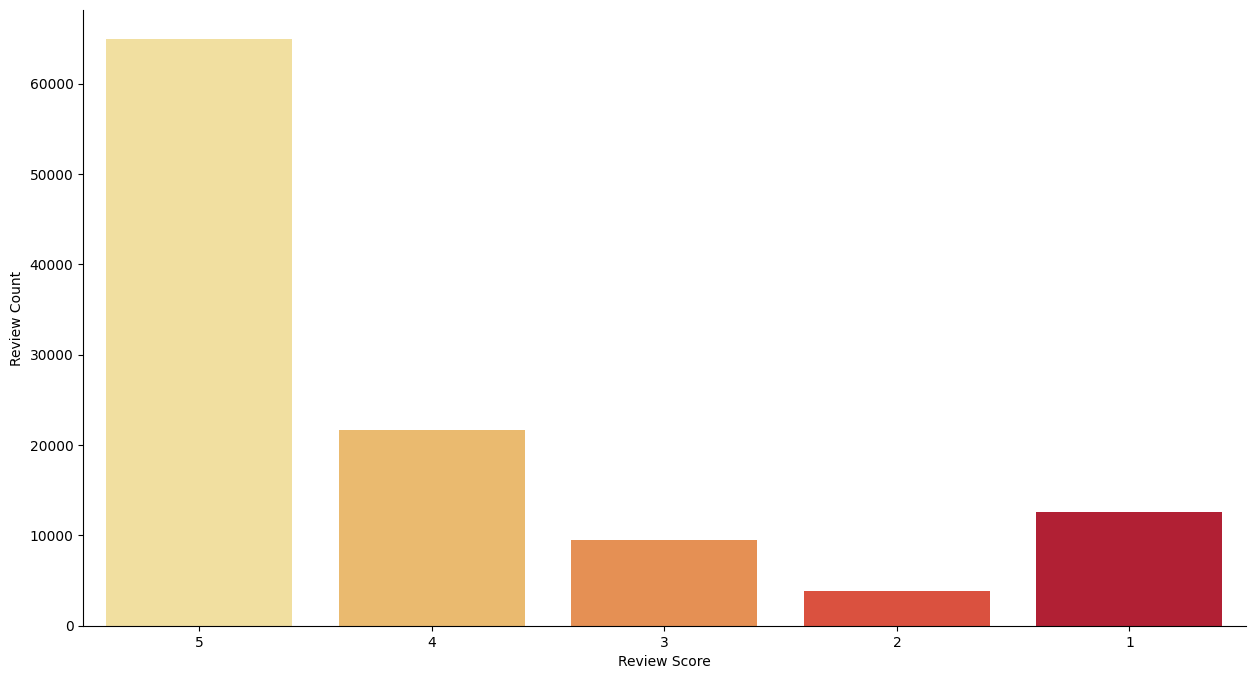

In [29]:
# Product Review Scores

# Count the review scores and sort in descending order
review_counts = Complete_Data.review_score.value_counts().sort_index(ascending=False)

# Convert the index to string for proper labeling on the x-axis
Review_Score = [str(i) for i in review_counts.index]

# Plot the sorted bar chart
plt.figure(figsize=[15, 8])
sns.barplot(x=Review_Score, y=review_counts.values, palette='YlOrRd')
#plt.title('Product Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Review Count')
sns.despine()
plt.show()


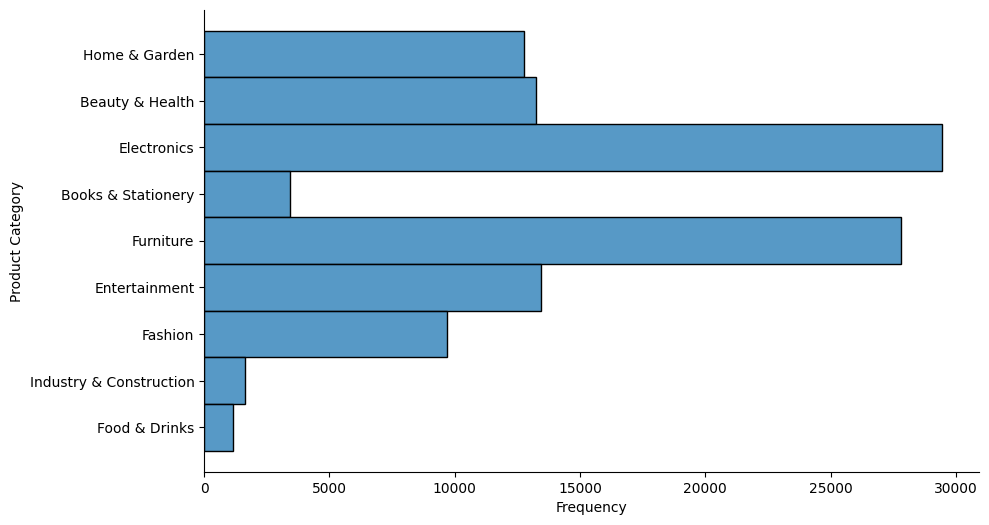

In [30]:
# Number of Orders per each Product Category

plt.figure(figsize=[10, 6])
sns.histplot(data=Complete_Data, y='product_category', multiple='stack')
#plt.title('Number of Orders per each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
sns.despine()
plt.show()

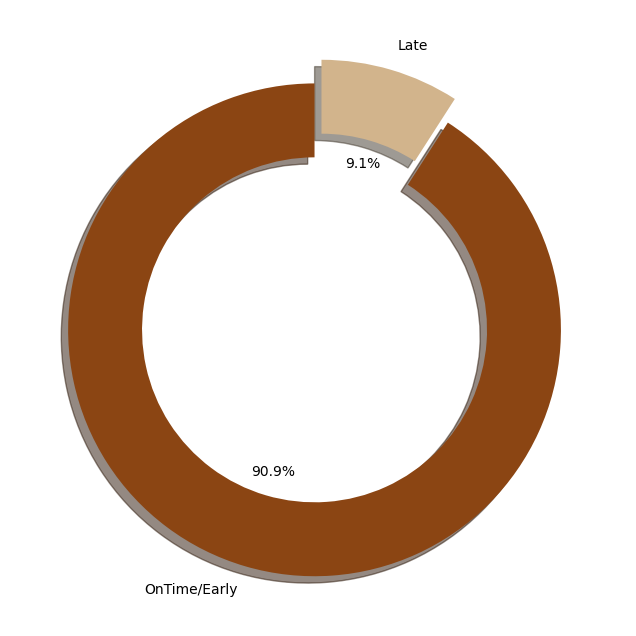

In [31]:
# Delivery Status Between Seller to Carrier

plt.figure(figsize=[10, 8])
Values = Complete_Data.Seller_to_Carrier_Status.value_counts().values
labels = Complete_Data.Seller_to_Carrier_Status.value_counts().index
plt.pie(Values, explode=(0.05, 0.05), labels=labels, autopct='%1.1f%%', shadow=True, colors=('#8B4513', '#D2B48C'), startangle=90, wedgeprops={'width':0.3})
#plt.title('Seller to Carrier Package Delivery Status', fontsize=15)
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

([<matplotlib.patches.Wedge at 0x189eb473a50>,
 [Text(-1.1184692198599222, 0.2674445815976409, 'OnTime/Early'),
  Text(1.118469244899886, -0.2674444768789945, 'Late')],
 [Text(-0.6321782547034343, 0.15116432872910135, '92.5%'),
  Text(0.6321782688564572, -0.15116426954030118, '7.5%')])

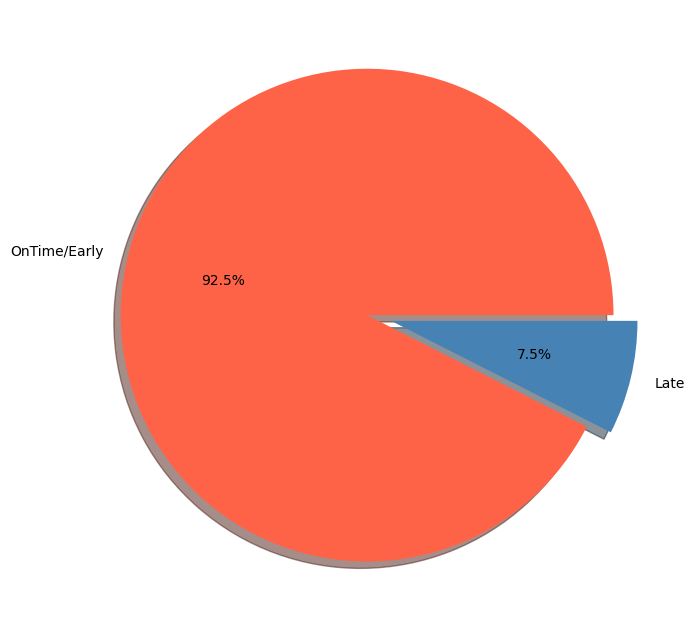

In [32]:
# Arrival Status of Packages

plt.figure(figsize=[10, 8])
Values = Complete_Data.Arrival_Status.value_counts().values
labels = Complete_Data.Arrival_Status.value_counts().index
plt.pie(Values, explode=(0.05, 0.05), labels=['OnTime/Early', 'Late'], 
        autopct='%1.1f%%', shadow=True, colors=('#FF6347', '#4682B4'))
#plt.title('Package Arrival Status Distribution', fontsize=15)

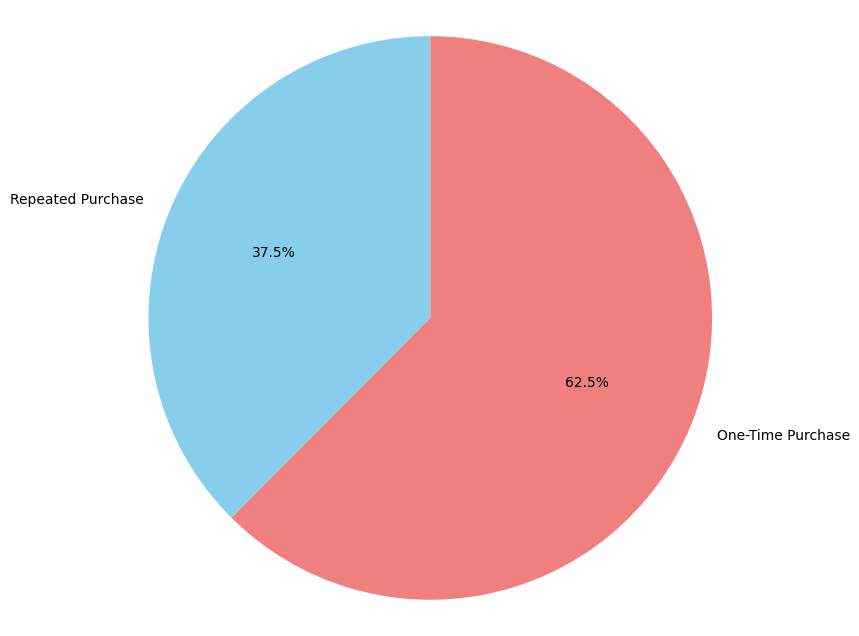

In [33]:
# Pie-Chart for Repurchase Intentions

pie_value = pd.DataFrame({
    'Category': ["Repeated Purchase", "One-Time Purchase"],
    'Share': [Repeated_Share, 100 - Repeated_Share]
})

plt.figure(figsize=(8, 8))
plt.pie(pie_value['Share'], labels=pie_value['Category'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
#plt.title("Percentage of Repeated Purchases")
plt.axis('equal')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\1605364540.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = Review_Category, y= Complete_Data.review_category.value_counts().values, palette= 'rocket')


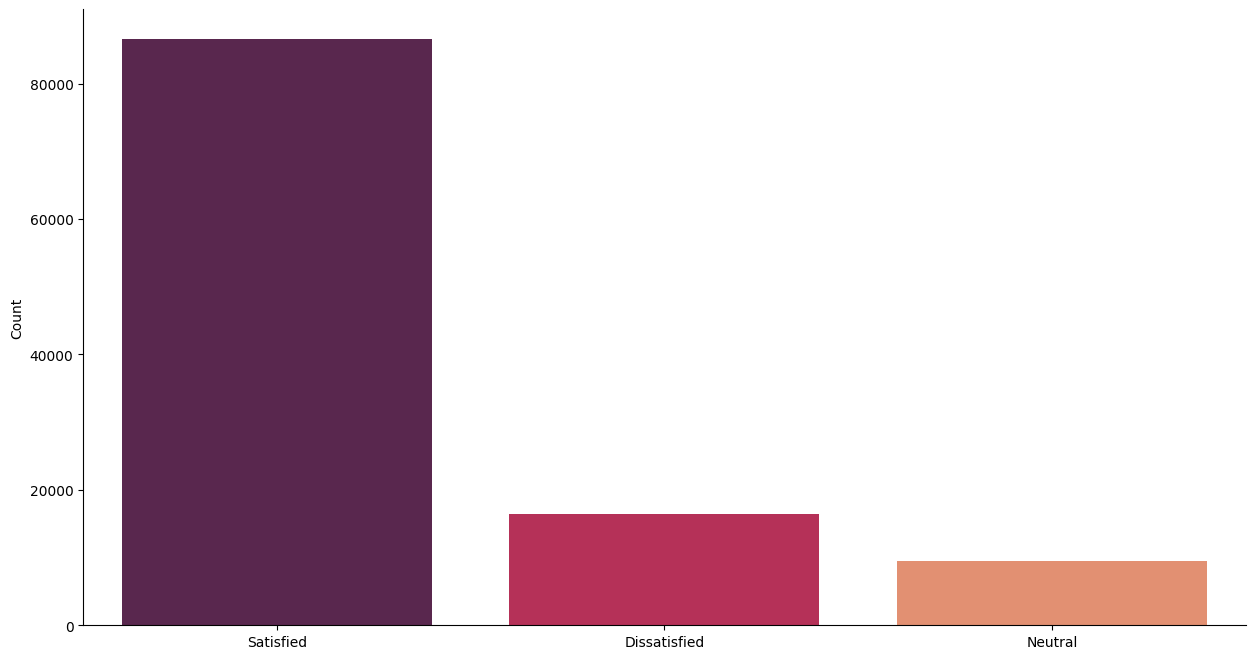

In [34]:
# Product Review Category

plt.figure(figsize=[15, 8])
Review_Category = [str(i) for i in Complete_Data.review_category.value_counts().index]
sns.barplot(x = Review_Category, y= Complete_Data.review_category.value_counts().values, palette= 'rocket')
#plt.title('Product Review Category')
plt.ylabel('Count')
sns.despine()
plt.show()

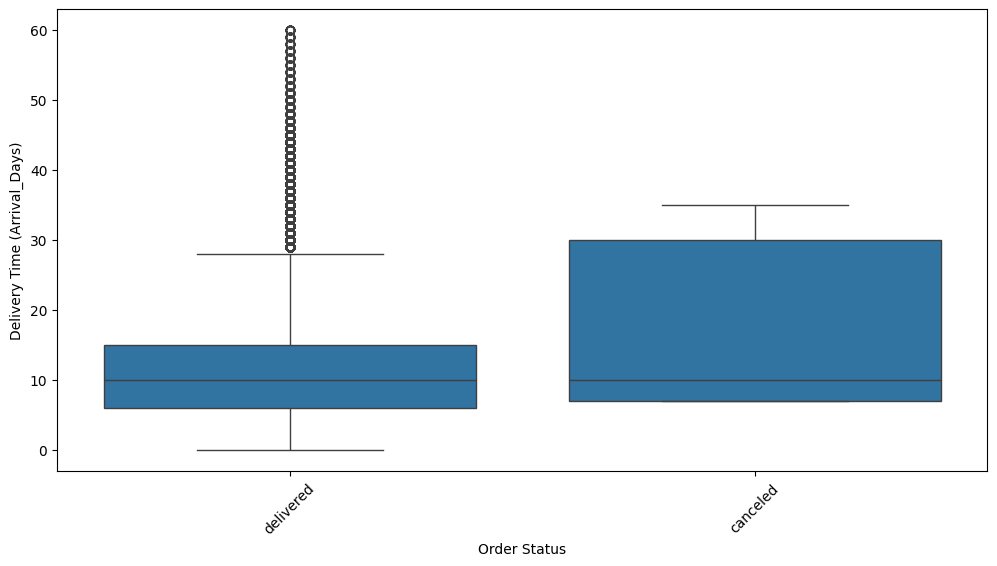

In [35]:
# Order Status VS Delivery Time

plt.figure(figsize=(12, 6))
sns.boxplot(data=Complete_Data, x='order_status', y='Arrival_Days')
#plt.title('Order Status VS Delivery Time')
plt.xlabel('Order Status')
plt.ylabel('Delivery Time (Arrival_Days)')
plt.xticks(rotation=45)
plt.show()

# Use a box plot to display the distribution of delivery times for each order status. 
# This will help identify any patterns or anomalies in delivery times based on the status of the orders.

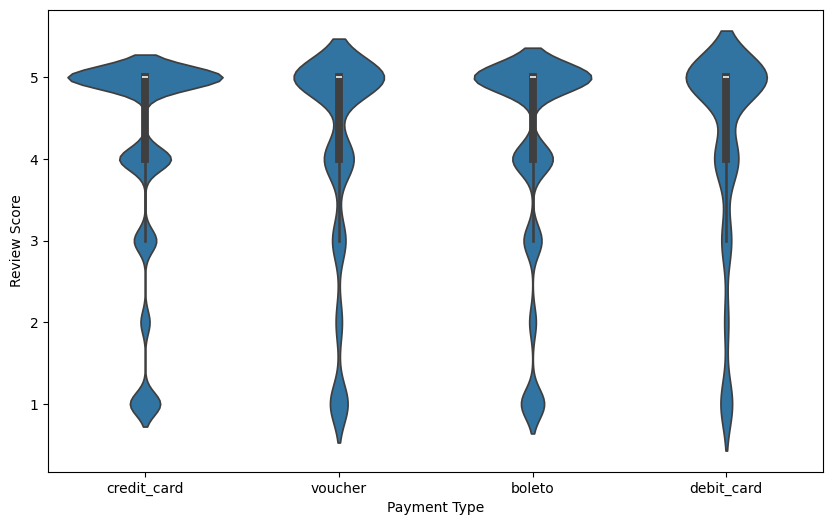

In [36]:
# Distribution of Review Score with respect to Payment Type

plt.figure(figsize=(10, 6))
sns.violinplot(data=Complete_Data, x='payment_type', y='review_score')
#plt.title('Distribution of Review Score with respect to Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Review Score')
plt.show()

# Use a violin plot to visualize the distribution of review scores across different payment types. 
# Violin plots will show the density of review scores for each payment method.
# Analyze how the payment method impacts customer satisfaction (measured by review_score).

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\2761347375.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = Complete_Data.resample('M', on='order_purchase_timestamp').size()


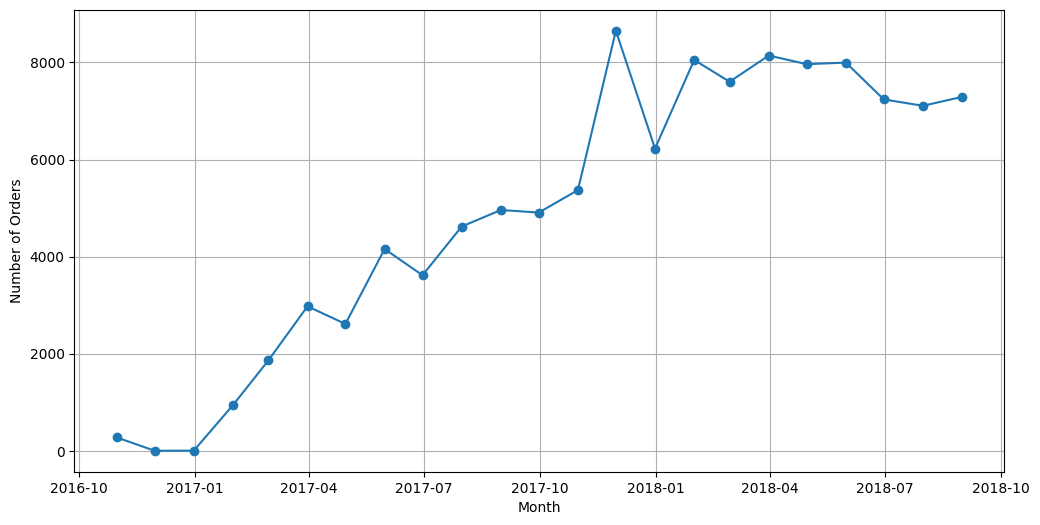

In [37]:
# Order Count Over Time

orders_per_month = Complete_Data.resample('M', on='order_purchase_timestamp').size()

plt.figure(figsize=(12, 6))
plt.plot(orders_per_month.index, orders_per_month.values, marker='o')
#plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

# Understand trends over time by plotting the number of orders placed per month 

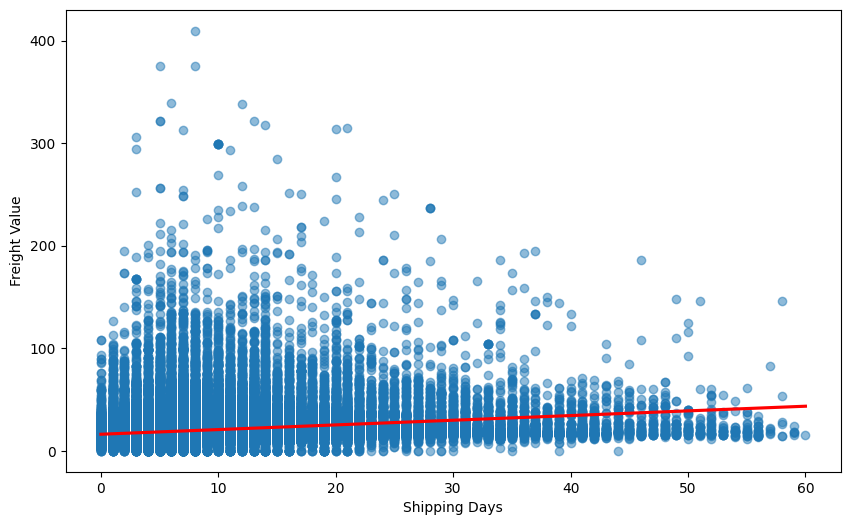

In [38]:
# Shipping Days vs Freight Value

plt.figure(figsize=(10, 6))
sns.regplot(data=Complete_Data, x='Shipping_Days', y='freight_value', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
#plt.title('Shipping Days vs Freight Value')
plt.xlabel('Shipping Days')
plt.ylabel('Freight Value')
plt.show()

# Explore the relationship between Shipping_Days and freight_value to see if higher shipping costs correlate with faster delivery.
# Use a scatter plot with a regression line to observe any trends between the shipping days and freight value

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\1298547420.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_review_score.values, y=avg_review_score.index, palette='PuBuGn')


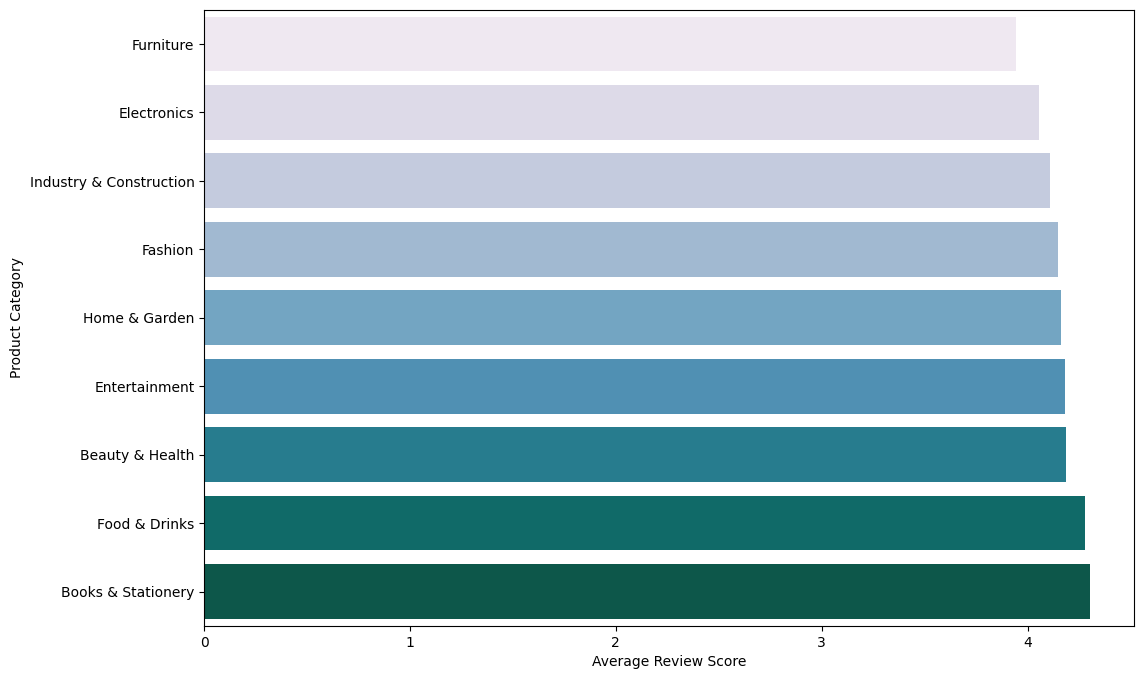

In [39]:
# Product Category vs. Average Review Score

avg_review_score = Complete_Data.groupby('product_category')['review_score'].mean().sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_review_score.values, y=avg_review_score.index, palette='PuBuGn')
#plt.title('Average Review Score by Product Category')
plt.xlabel('Average Review Score')
plt.ylabel('Product Category')
plt.show()

# Determine which product categories have the highest customer satisfaction
# Bar plot to display the average review score for each product category

C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)


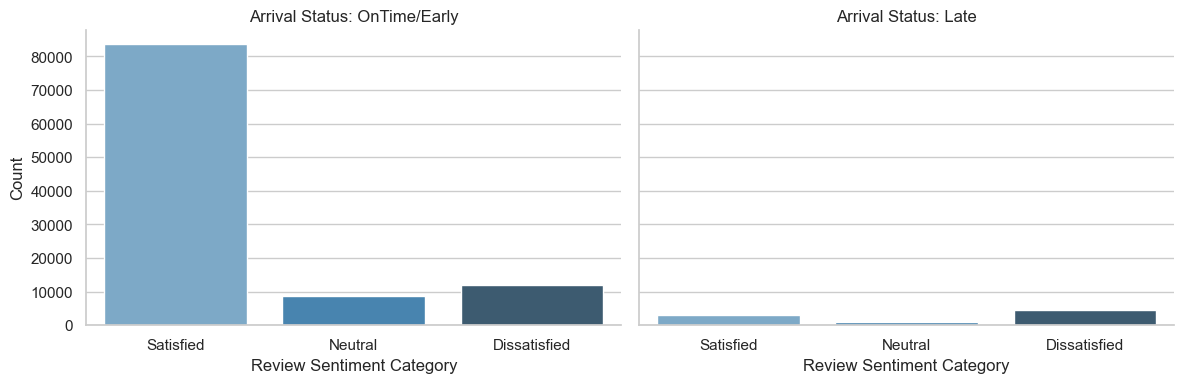

In [40]:
# Review Sentiment Distribution by Delivery Status

sns.set(style="whitegrid")
g = sns.FacetGrid(Complete_Data, col="Arrival_Status", height=4, aspect=1.5)
g.map(sns.countplot, "review_category", order=['Satisfied', 'Neutral', 'Dissatisfied'], palette="Blues_d")
g.set_axis_labels("Review Sentiment Category", "Count")
g.set_titles("Arrival Status: {col_name}")
#g.fig.suptitle('Review Sentiment Distribution by Delivery Status', y=1.02)
plt.show()

# Investigate how the delivery status (Arrival_Status, Estimated_Delivery_Cat, Shipping_Delivery_Cat) influences the review sentiment.
# Multi-panel bar plot (facet grid) to compare the distribution of review scores across different delivery status categories.

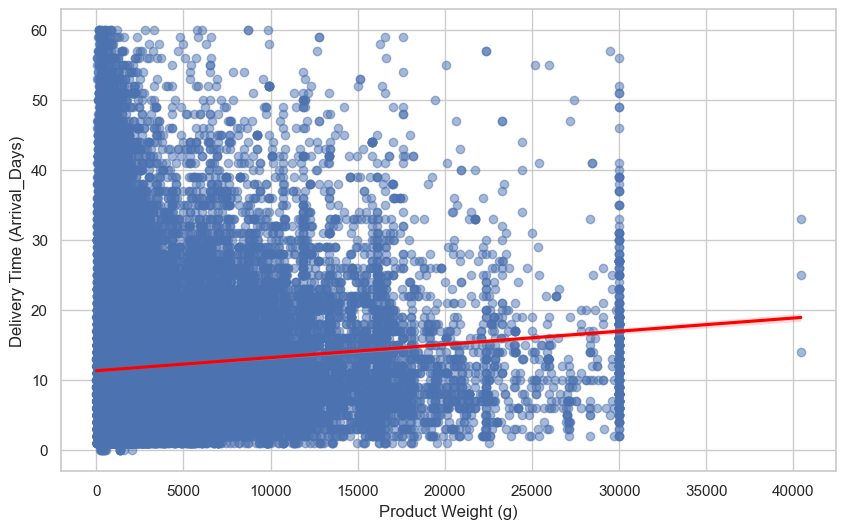

In [41]:
# Product Weight VS Delivery Time

plt.figure(figsize=(10, 6))
sns.regplot(data=Complete_Data, x='product_weight_g', y='Arrival_Days', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
#plt.title('Product Weight vs Delivery Time')
plt.xlabel('Product Weight (g)')
plt.ylabel('Delivery Time (Arrival_Days)')
plt.show()

# Determining if heavier products tend to have longer delivery times
# Using a scatter plot with a regression line to explore the relationship between product_weight_g and Arrival_Days.

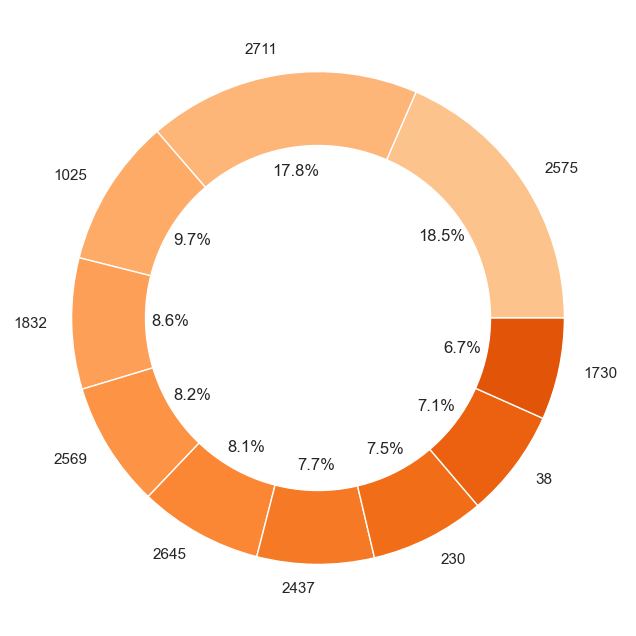

In [42]:
# Top Sellers by Average Product Price

top_sellers = Complete_Data.groupby('seller_id')['price'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_sellers.values, labels=top_sellers.index, autopct='%1.1f%%', colors=plt.cm.Oranges(np.linspace(0.3, 0.7, len(top_sellers))))
# Adding a white circle at the center to transform the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
#plt.title('Top 10 Sellers by Average Product Price')
plt.show()


# Identifying the top sellers by the average price of the products they sell.
# 

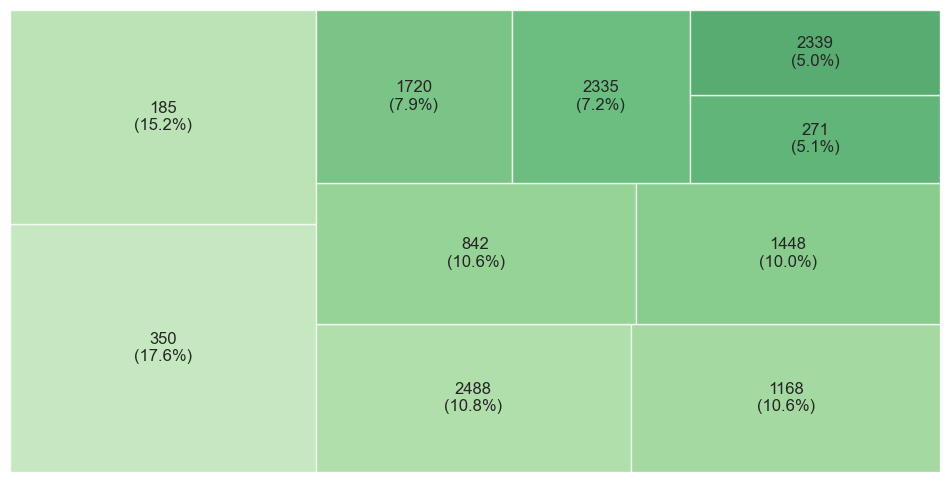

In [43]:
# Top 10 Sellers by Repeated Purchases

Repeated_Purchases = Complete_Data.groupby(['customer_unique_id', 'seller_id']).size().reset_index(name='purchase_count')
Repeated_Purchases = Repeated_Purchases[Repeated_Purchases['purchase_count'] > 1]

# Count the number of repeated purchases per seller
Repeated_Purchase_Counts = Repeated_Purchases['seller_id'].value_counts().head(10)

# Calculate the proportion of each seller's repeated purchases
total_purchases = Repeated_Purchase_Counts.sum()
proportions = Repeated_Purchase_Counts / total_purchases * 100

# Create labels that include the seller ID and their proportion of repeated purchases
labels = [f'{seller}\n({prop:.1f}%)' for seller, count, prop in 
          zip(Repeated_Purchase_Counts.index, Repeated_Purchase_Counts.values, proportions)]

# Plot the treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=Repeated_Purchase_Counts.values, label=labels , 
              color=plt.cm.Greens(np.linspace(0.3, 0.7, len(Repeated_Purchase_Counts))), alpha=.8)
#plt.title('Top 10 Sellers by Repeated Purchases')
plt.axis('off')
plt.show()

# Treemap Description: A treemap visualizes hierarchical data using nested rectangles, 
# where the area of each rectangle is proportional to the value it represents. 
# It can give a visual impression of the distribution and hierarchy among the top sellers.

# graph provides insights into seller loyalty by showing which sellers have the most repeat customers, 
# helping to identify key players in the marketplace

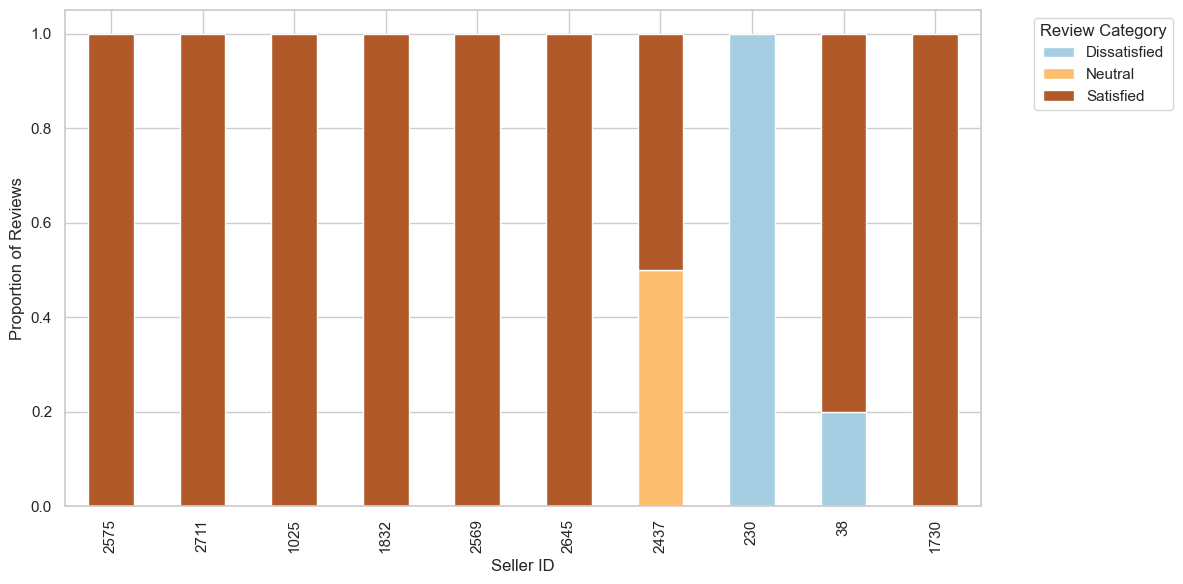

In [44]:
# Review Sentiment Distribution for Top 10 Sellers

review_data = Complete_Data.groupby(['seller_id', 'review_category']).size().unstack().fillna(0)

# Get the top 10 sellers by total number of reviews
top_sellers = Complete_Data.groupby('seller_id')['price'].mean().sort_values(ascending=False).head(10)
# top_sellers = review_data.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the review data to include only the top 10 sellers
review_data_top_sellers = review_data.loc[top_sellers.index]

# Normalize the data to get proportions (optional)
review_data_top_sellers_norm = review_data_top_sellers.div(review_data_top_sellers.sum(axis=1), axis=0)

# Plotting the stacked bar plot
review_data_top_sellers_norm.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Paired')
#plt.title('Review Sentiment Distribution for Top 10 Sellers')
plt.xlabel('Seller ID')
plt.ylabel('Proportion of Reviews')
#plt.xticks(rotation=45)
plt.legend(title='Review Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# This visualization clearly shows the sentiment distribution of reviews for the top 10 sellers. 
# By examining the stacked bars, you can quickly assess which sellers are receiving more Satisfied, Neutral, or Dissatisfied feedback. 
# This insight is valuable for understanding customer satisfaction and potential areas for seller improvement

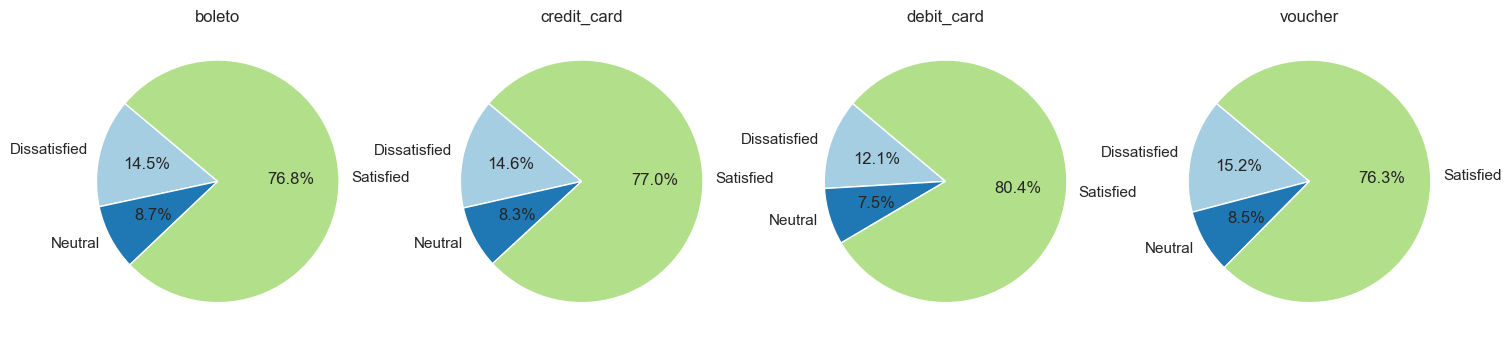

In [45]:
# Payment Type with respect to Review Category Distribution

review_category_payment = Complete_Data.groupby(['payment_type', 'review_category']).size().unstack().fillna(0)
review_category_payment_norm = review_category_payment.div(review_category_payment.sum(axis=1), axis=0)

# Plot a pie chart for each payment type
fig, axes = plt.subplots(1, len(review_category_payment_norm.index), figsize=(18, 6))

for i, payment_type in enumerate(review_category_payment_norm.index):
    axes[i].pie(review_category_payment_norm.loc[payment_type],
                labels=review_category_payment_norm.columns,
                autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(payment_type)

#plt.suptitle('Distribution of Payment Type with respect to Review Sentiment')
plt.show()


# Explore how review sentiment (review_category) varies across different payment methods.
# 

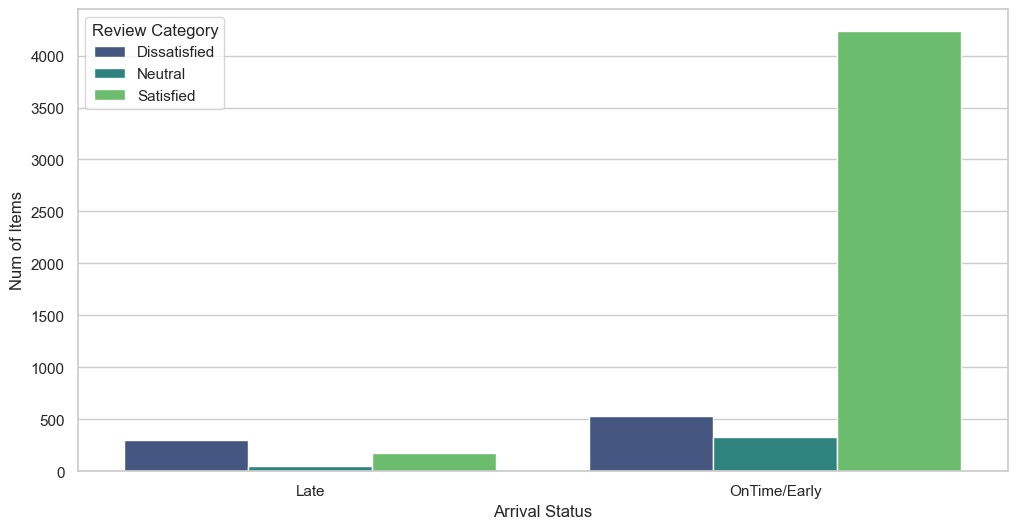

In [46]:
# Review Categories for 5% of Highest-Priced Items with respect to Arrival Status

Highest_Priced_Items = Complete_Data.nlargest(round(0.05*len(Complete_Data.price)), 'price')
Aggregated_data = Highest_Priced_Items.groupby(['Arrival_Status', 'review_category']).size().reset_index(name='Num of Items')

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=Aggregated_data, x='Arrival_Status', y='Num of Items', hue='review_category', palette='viridis')
#plt.title('Review Categories for 5% of Highest-Priced Items by Arrival Status')
plt.xlabel('Arrival Status')
plt.ylabel('Num of Items')
plt.legend(title='Review Category')
plt.show()

## Sentiment Analysis

In [47]:
# Download NLTK data files
nltk.download('stopwords')
nltk.download('punkt')

stemmer = PorterStemmer()
Text_Data = []

for i in range(Reviews_Data.shape[0]):
    statement = re.sub('[^a-zA-Z]', ' ', Reviews_Data.review_comment_message[i])
    statement = statement.lower()
    statement = statement.strip()
    statement = statement.split()
    statement = [stemmer.stem(word) for word in statement if word not in set(stopwords.words('portuguese'))]
    statement = ' '.join(statement)
    
    Text_Data.append(statement)

# Text_Data
Reviews_Data['text_data'] = Text_Data
Reviews_Data.head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\pc\AppData\Local\Temp\ipykernel_17464\1670132021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Reviews_Data['text_data'] = Text_Data


,review_comment_message,review_score,review_category,text_data
0,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied,n testei produto ainda veio correto boa condi ...
1,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied,n testei produto ainda veio correto boa condi ...
2,"Não testei o produto ainda, mas ele veio corre...",4,Satisfied,n testei produto ainda veio correto boa condi ...
3,Muito bom o produto.,4,Satisfied,bom produto
4,O produto foi exatamente o que eu esperava e e...,5,Satisfied,produto exatament esperava descrito site chego...
5,Aguardando retorno da loja,1,Dissatisfied,aguardando retorno loja
6,Aguardando retorno da loja,1,Dissatisfied,aguardando retorno loja
7,Gostei do produto,4,Satisfied,gostei produto
8,Obrigado pela atenção. Lojas lannister perfeit...,5,Satisfied,obrigado aten loja lannist perfeito tudo
9,os correios estäo em greve... näo recebi nenhu...,2,Dissatisfied,correio est greve n recebi nenhum aviso atraso...


In [48]:
Dissatisfied_Data = Reviews_Data[Reviews_Data.review_category == 'Dissatisfied']

# Reset index
Dissatisfied_Data.reset_index(inplace= True, drop= True)
Dissatisfied_Data.head(10)

stemmer = PorterStemmer()
Dissatisfied = []

for i in range(Dissatisfied_Data.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', Dissatisfied_Data.text_data[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    Dissatisfied.append(comment)


In [49]:
Dissatisfied_eng = []
random.seed(42)

for sentence in random.sample(Dissatisfied, 1000):
    Dissatisfied_eng.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))

# Apply stemming to the translated text
Dissatisfied_final = []

for sent in Dissatisfied_eng:
    for word in sent.split():
        if word not in set(stopwords.words('english')):
            Dissatisfied_final.append(stemmer.stem(word))



(-0.5, 999.5, 799.5, -0.5)

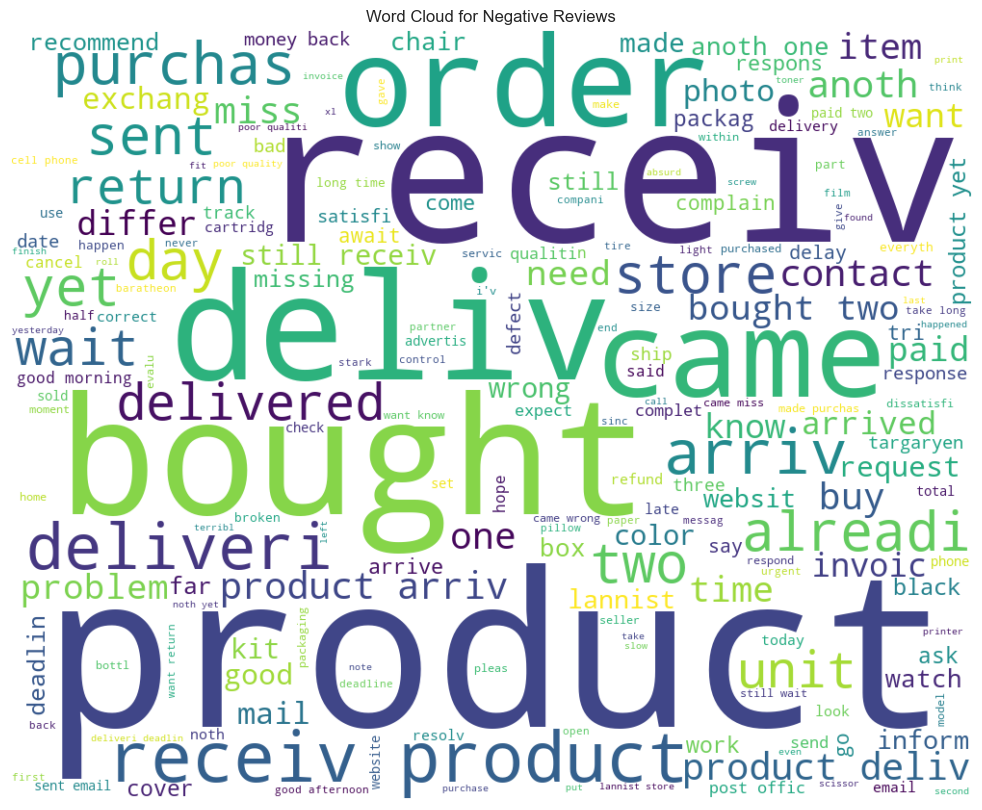

In [50]:
Dissatisfied_words = ' '.join(Dissatisfied_final)
Dissatisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(Dissatisfied_words)

plt.figure(figsize=(15, 10))
plt.title('Word Cloud for Negative Reviews')
plt.imshow(Dissatisfied_freq, interpolation='bilinear')
plt.axis("off")
#plt.savefig('Dissatisfied_WordCloud.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

In [51]:
Satisfied_Data = Reviews_Data[Reviews_Data.review_category == 'Satisfied']

# Reset index
Satisfied_Data.reset_index(inplace= True, drop= True)
Satisfied_Data.head(10)

stemmer = PorterStemmer()
Satisfied = []

for i in range(Satisfied_Data.shape[0]):
    comment = re.sub('[^a-zA-Z]', ' ', Satisfied_Data.text_data[i])
    comment = comment.lower()
    comment = comment.strip()
    comment = comment.split()
    comment = [stemmer.stem(word) for word in comment if word not in set(stopwords.words('portuguese'))]
    comment = ' '.join(comment)
    
    Satisfied.append(comment)


In [52]:
Satisfied_eng = []
random.seed(42)

for sentence in random.sample(Satisfied, 1000):
    Satisfied_eng.append(GoogleTranslator(source='portuguese', target='english').translate(sentence))
    

# Apply stemming to the translated text
Satisfied_final = []

for sent in Satisfied_eng:
    for word in sent.split():
        if word not in set(stopwords.words('english')):
            Satisfied_final.append(stemmer.stem(word))


(-0.5, 999.5, 799.5, -0.5)

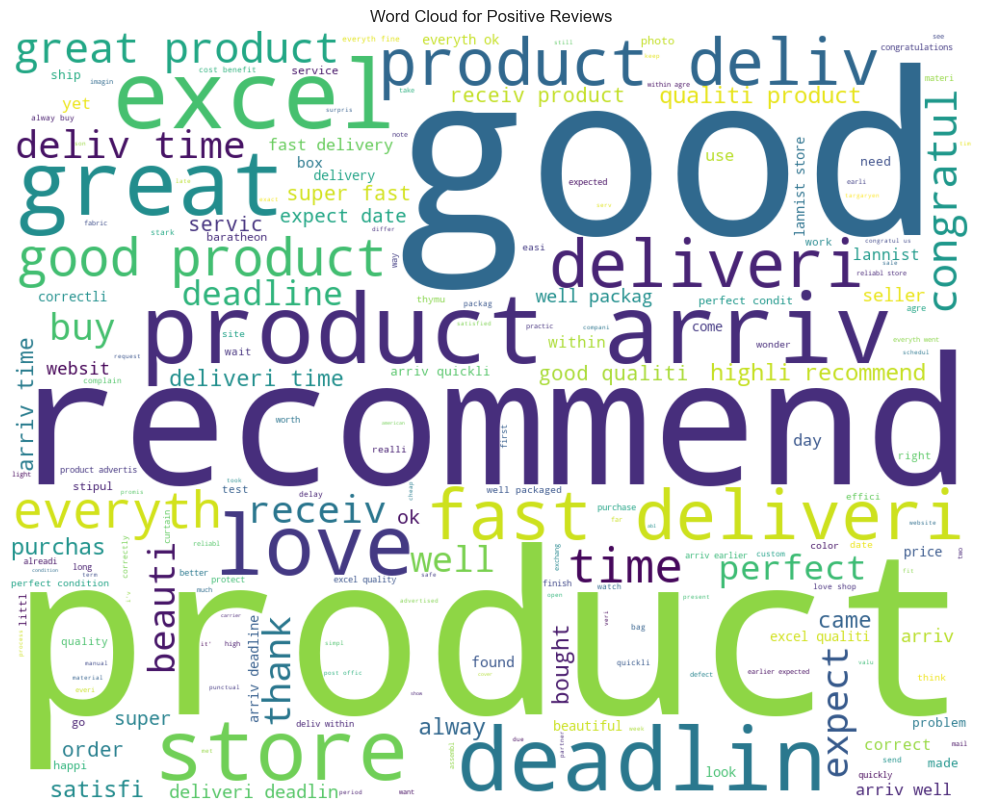

In [53]:
Satisfied_words = ' '.join(Satisfied_final)
Satisfied_freq = WordCloud(width=1000, height=800, background_color='white').generate(Satisfied_words)

plt.figure(figsize=(15, 10))
plt.title('Word Cloud for Positive Reviews')
plt.imshow(Satisfied_freq, interpolation='bilinear')
plt.axis("off")
#plt.savefig('Satisfied WordCloud.jpeg', format='jpeg', dpi=300, bbox_inches='tight')

X_train (32896, 11931)
y_train (32896,)
X_test (14099, 11931)
y_test (14099,)
Naive Bayes Accuracy for Sentiment Analysis: 0.83
Naive Bayes Precision Score (Macro-Averaged): 0.82
Naive Bayes Classification Report:
              precision    recall  f1-score   support

Dissatisfied       0.74      0.81      0.78      3774
     Neutral       0.86      0.02      0.04      1342
   Satisfied       0.86      0.95      0.90      8983

    accuracy                           0.83     14099
   macro avg       0.82      0.60      0.57     14099
weighted avg       0.83      0.83      0.79     14099

Naive Bayes Train Accuracy: 0.84
Naive Bayes Train Precision Score (Macro-Averaged): 0.87


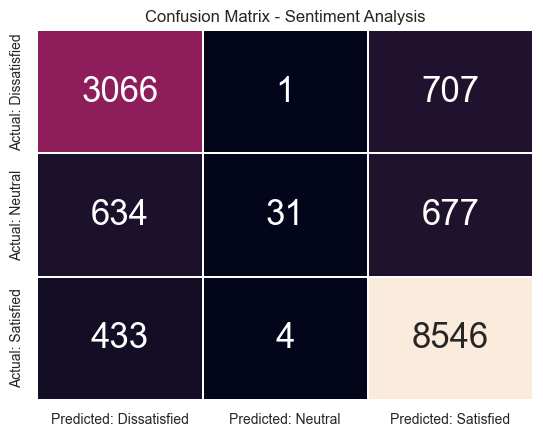

Cross-validation scores for Sentiment Analysis are: [0.81870412 0.81604426 0.82508778 0.82157676 0.82402383]
Average performance is: 82.1 +/- 0.4 %


In [54]:
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer() 

# Fit and transform the documents to create TF-IDF features and Corresponding sentiment labels (Dissatisfied, Neutral, Satisfied)
X_SA = tfidf_vectorizer.fit_transform(Reviews_Data.text_data).toarray()
X_SA = pd.DataFrame(X_SA, columns= tfidf_vectorizer.get_feature_names_out())
y_SA = Reviews_Data.review_category

# Split the data into training and test sets
X_train_SA, X_test_SA, y_train_SA, y_test_SA = train_test_split(X_SA, y_SA, test_size=0.3, random_state=42)

# check the dimensions of the train & test subset using 'shape'
print('X_train', X_train_SA.shape)
print('y_train', y_train_SA.shape)
print('X_test', X_test_SA.shape)
print('y_test', y_test_SA.shape)


# Train a classifier (e.g., Naive Bayes)
model_SA = MultinomialNB()
model_SA.fit(X_train_SA, y_train_SA)


# Predicting sentiment on the test set and Evaluating the model
y_pred_test_SA = model_SA.predict(X_test_SA)
test_accuracy_SA = accuracy_score(y_test_SA, y_pred_test_SA)
test_precision_SA = precision_score(y_test_SA, y_pred_test_SA, average='macro') 
print(f"Naive Bayes Accuracy for Sentiment Analysis: {test_accuracy_SA:.2f}")
print(f"Naive Bayes Precision Score (Macro-Averaged): {test_precision_SA:.2f}")
print("Naive Bayes Classification Report:")
print(classification_report(y_test_SA, y_pred_test_SA))


# Predicting sentiment on the train set and Evaluating the model
y_pred_train_SA = model_SA.predict(X_train_SA)
train_accuracy_SA = accuracy_score(y_train_SA, y_pred_train_SA)
train_precision_SA = precision_score(y_train_SA, y_pred_train_SA, average='macro')
print(f"Naive Bayes Train Accuracy: {train_accuracy_SA:.2f}")
print(f"Naive Bayes Train Precision Score (Macro-Averaged): {train_precision_SA:.2f}")


cm_SA = confusion_matrix(y_test_SA, y_pred_test_SA)
conf_matrix = pd.DataFrame(data = cm_SA, columns = ['Predicted: Dissatisfied','Predicted: Neutral','Predicted: Satisfied'], index = ['Actual: Dissatisfied','Actual: Neutral','Actual: Satisfied'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title("Confusion Matrix - Sentiment Analysis")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Use K-fold cross-validation to compute the mean accuracy
k=5
cv_scores_SA = cross_val_score(model_SA, X_SA, y_SA, cv=k)
print('Cross-validation scores for Sentiment Analysis are:',cv_scores_SA)

# Compute the average of the accuracies and its error
avg_SA = sum(cv_scores_SA)/len(cv_scores_SA)
sd_SA = sqrt(sum((cv_scores_SA-avg_SA)**2)/(len(cv_scores_SA)-1))
print('Average performance is:',np.round(avg_SA*100,1),'+/-',np.round(sd_SA*100,1),'%')


## Customer Segmentation: Clustering and Classification

In [55]:
# Generating Recency, Frequency, Monetary Table by Grouping Data

# Calculating Recency using Last Purchase Date of the dataset
Last_Ref_Date = max(Complete_Data.order_purchase_timestamp).date()


Table_RFM = Complete_Data.groupby('customer_unique_id').agg(
    {'order_purchase_timestamp': lambda x:(datetime.strptime(str(Last_Ref_Date),'%Y-%m-%d') - x.max()).days,
     'product_id': 'count',
     'payment_value': 'sum'})

Table_RFM.rename(columns={'order_purchase_timestamp':'Recency',
                          'product_id':'Frequency',
                          'payment_value':'Monetary'
                          }, inplace=True)

Table_RFM.head(10)

,Recency,Frequency,Monetary
customer_unique_id,,,
0,110,1,141.90
1,113,1,27.19
2,536,1,86.22
3,320,1,43.62
4,287,1,196.89
5,145,1,166.98
6,130,1,35.38
7,181,2,838.36
8,542,1,150.12


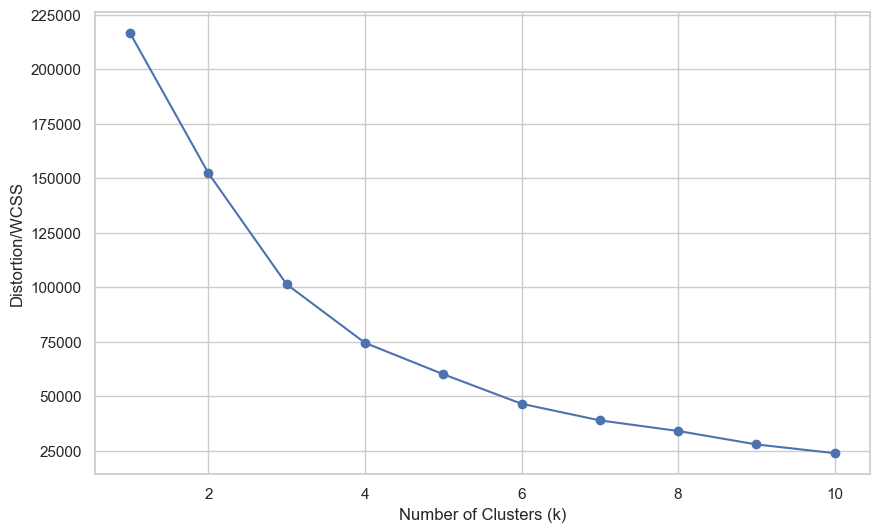

Average Silhouette Score: 0.4948795440540519


In [56]:
# Normalizing numerical features
scaler = StandardScaler()
Table_RFM_scaled = scaler.fit_transform(Table_RFM)

# PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
Table_RFM_pca = pca.fit_transform(Table_RFM_scaled)

# Calculating distortions for a range of number of clusters from 1 to 10
distortions = []
K = range(1, 11)  # Testing 1 to 10 clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(Table_RFM_pca)
    distortions.append(kmeanModel.inertia_)

# Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion/WCSS')
#plt.title('The Elbow Method to Determine Optimal Number of Clusters')
plt.show()

# Choosing k = 3 with the Elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
RFM_cluster_labels = kmeans.fit_predict(Table_RFM_pca)

# Step 6: Calculate the silhouette score to evaluate the clustering quality
silhouette_avg = silhouette_score(Table_RFM_pca, RFM_cluster_labels)
print(f'Average Silhouette Score: {silhouette_avg}')


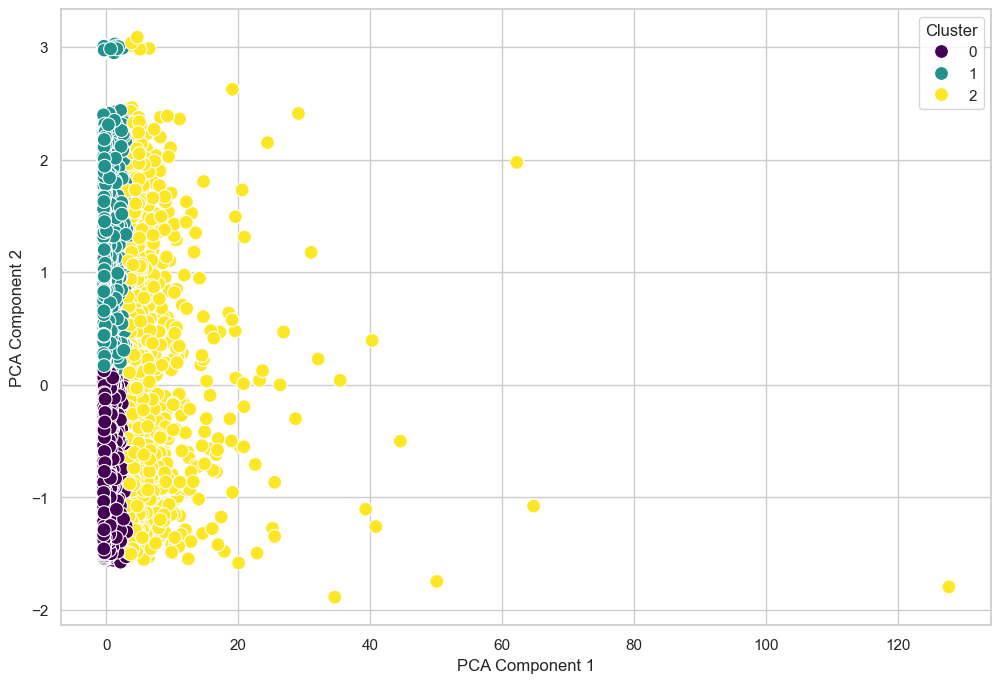

In [57]:
# Step 7: Plotting the clusters of Customer Segmentation after PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=Table_RFM_pca[:, 0], y=Table_RFM_pca[:, 1], hue=RFM_cluster_labels, palette='viridis', s=100)
#plt.title('K-Means Clustering of Customer Segmentation After PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

            Recency  Frequency     Monetary
Cluster                                    
0        124.972747   1.167483   178.544187
1        383.705159   1.181117   178.647283
2        233.694509   5.660480  2522.705739


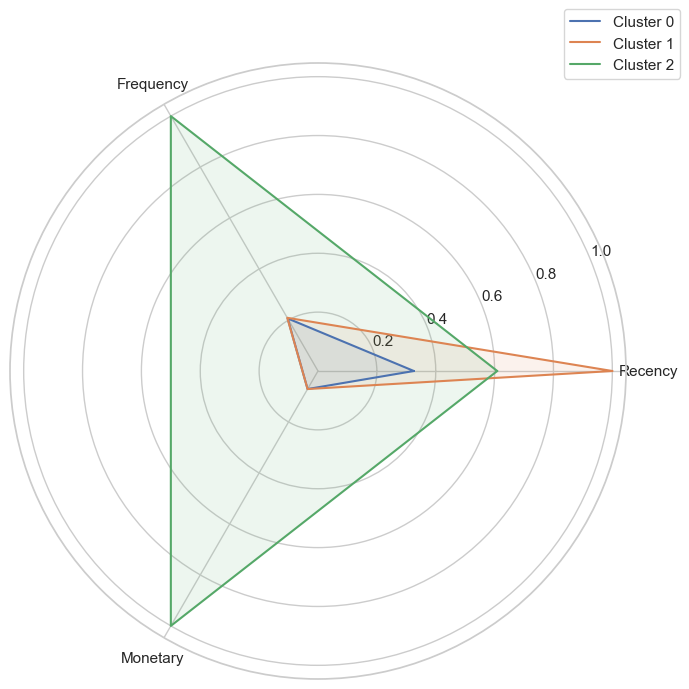

In [58]:
# Radar Chart for Customer Segmentation

# Assigning the clusters to each data point Table_RFM 
Table_RFM['Cluster'] = RFM_cluster_labels
cluster_summary = Table_RFM.groupby('Cluster').mean()
print(cluster_summary)


# Aggregate the mean values of each feature by cluster
cluster_means = Table_RFM.groupby('Cluster').mean()

# Normalize the aggregated data
cluster_means_normalized = cluster_means / cluster_means.max()
categories = list(cluster_means_normalized.columns)

# Create a list of cluster labels
clusters = list(cluster_means_normalized.index)

# Number of variables we're plotting (the number of features)
num_vars = len(categories)

# Compute the angle of each axis in the plot (divide the plot / number of variables)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the plot is a circle

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i, cluster in enumerate(clusters):
    values = cluster_means_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]  # Ensure the plot is a circle
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)  # Fill in the area for each cluster

# Add labels for each feature/axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Draw one axe per variable and add labels
#plt.title('Radar Chart of K-Means Clusters for Customer Segmentation')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

X_train (63697, 2)
y_train (63697,)
X_test (27300, 2)
y_test (27300,)
KNN Accuracy for Customer Segmentation: 1.00
KNN Precision Score (Macro-Averaged): 1.00
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15528
           1       1.00      1.00      1.00     11401
           2       0.99      1.00      1.00       371

    accuracy                           1.00     27300
   macro avg       1.00      1.00      1.00     27300
weighted avg       1.00      1.00      1.00     27300

KNN Train Accuracy: 1.00
KNN Train Precision Score (Macro-Averaged): 1.00


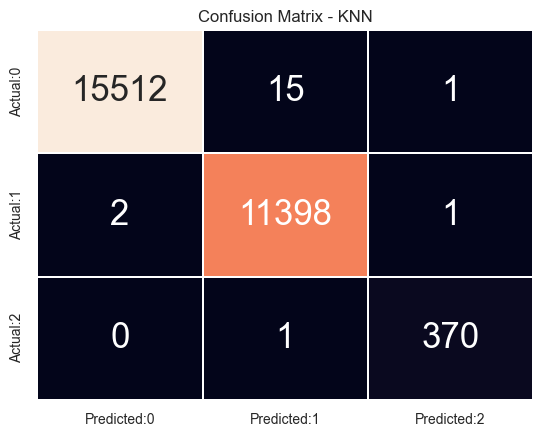

Cross-validation scores for Customer Segmentation are: [0.99895604 0.99928571 0.99945052 0.99956042 0.99906588]
Average performance is: 99.9 +/- 0.0 %


In [59]:

# Step 1: Prepare the data
X = Table_RFM_pca  # PCA-transformed features
y = RFM_cluster_labels  # Cluster labels from K-Means

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# check the dimensions of the train & test subset using 'shape'
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



# Step 3: Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)


# KNN Evaluation for Test
y_pred_knn_test = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_knn_test)
test_precision = precision_score(y_test, y_pred_knn_test, average='macro')  # You can change 'macro' to 'micro' or 'weighted'
print(f"KNN Accuracy for Customer Segmentation: {test_accuracy:.2f}")
print(f"KNN Precision Score (Macro-Averaged): {test_precision:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_test))


# KNN Evaluation for Train
y_pred_knn_train = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_knn_train)
train_precision = precision_score(y_train, y_pred_knn_train, average='macro')
print(f"KNN Train Accuracy: {train_accuracy:.2f}")
print(f"KNN Train Precision Score (Macro-Averaged): {train_precision:.2f}")


# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn_test)
conf_matrix = pd.DataFrame(data = cm_knn, columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title("Confusion Matrix - KNN")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Use K-fold cross-validation to compute the mean accuracy
k=5
cv_scores = cross_val_score(knn, X, y, cv=k)
print('Cross-validation scores for Customer Segmentation are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')


# # Optimized Silhouette Score
# silhouette_avg = silhouette_score(X_test, y_pred_knn_test)
# print(f"Optimized Silhouette Score: {silhouette_avg:.3f}")

XGBoost Accuracy for Customer Segmentation: 1.00
XGBoost Precision Score (Macro-Averaged): 0.98
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15528
           1       1.00      1.00      1.00     11401
           2       0.95      0.96      0.95       371

    accuracy                           1.00     27300
   macro avg       0.98      0.98      0.98     27300
weighted avg       1.00      1.00      1.00     27300

XGBoost Train Accuracy: 1.00
XGBoost Train Precision Score (Macro-Averaged): 0.99


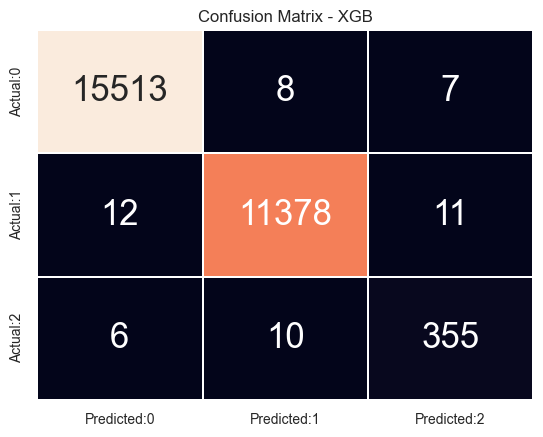

Cross-validation scores are: [0.99791209 0.99741758 0.99796692 0.99818671 0.99763723]
Average performance is: 99.8 +/- 0.0 %


In [60]:
# Initialize and train
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)


# XGB Evaluation for Test
y_pred_xgb_test = xgb.predict(X_test)
xgb_test_accuracy = accuracy_score(y_test, y_pred_xgb_test)
xgb_test_precision = precision_score(y_test, y_pred_xgb_test, average='macro')  # You can change 'macro' to 'micro' or 'weighted'
print(f"XGBoost Accuracy for Customer Segmentation: {xgb_test_accuracy:.2f}")
print(f"XGBoost Precision Score (Macro-Averaged): {xgb_test_precision:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_test))


# XGB Evaluation for Train
y_pred_xgb_train = xgb.predict(X_train)
xgb_train_accuracy = accuracy_score(y_train, y_pred_xgb_train)
xgb_train_precision = precision_score(y_train, y_pred_xgb_train, average='macro')
print(f"XGBoost Train Accuracy: {xgb_train_accuracy:.2f}")
print(f"XGBoost Train Precision Score (Macro-Averaged): {xgb_train_precision:.2f}")


# Confusion Matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb_test)
conf_matrix = pd.DataFrame(data = cm_xgb, columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title("Confusion Matrix - XGB")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 3
k=5
#decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=70)
xgb_cv_scores = cross_val_score(xgb, X, y, cv=k)
print('Cross-validation scores are:', xgb_cv_scores)

# Compute the average of the accuracies and its error
avg = sum(xgb_cv_scores)/len(xgb_cv_scores)
sd = sqrt(sum((xgb_cv_scores-avg)**2)/(len(xgb_cv_scores)-1))
print('Average performance is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')


# # Optimized Silhouette Score
# silhouette_avg_xgb = silhouette_score(X_test, y_pred_xgb_test)
# print(f"Optimized Silhouette Score: {silhouette_avg_xgb:.3f}")

### Seller Profiles: Clustering and Classification

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\2521425865.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seller['seller_state'] = Seller['seller_state'].map(state_mapping).fillna('Others')
C:\Users\pc\AppData\Local\Temp\ipykernel_17464\2521425865.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seller['product_category'] = le.fit_transform(Seller['product_category'])
C:\Users\pc\AppData\Local\Temp\ipykernel_17464\2521425865.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

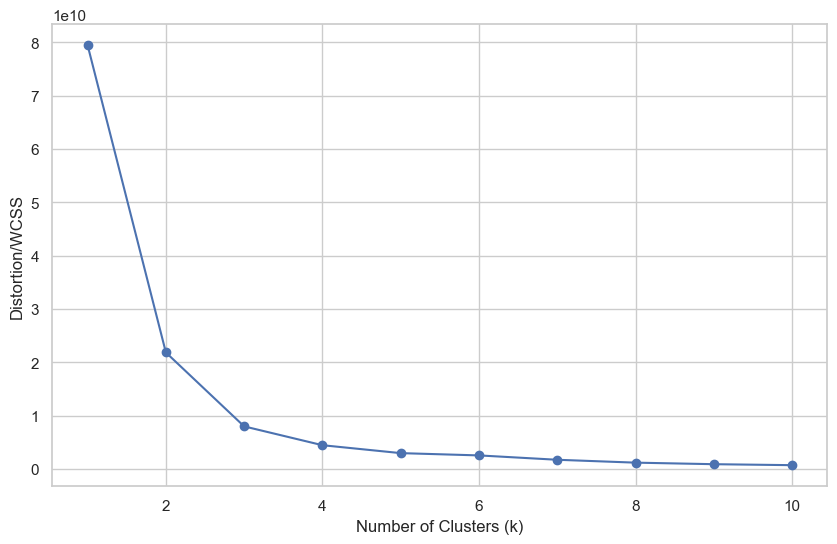

Average Silhouette Score: 0.6248427709928451


In [61]:
# Clustering for Seller Profiles

# Step 1: Identify Repeat Customers
repeat_customers = Complete_Data.groupby(['seller_id', 'customer_id'])['order_id'].count().reset_index()
repeat_customers = repeat_customers[repeat_customers['order_id'] > 1]
repeat_customers['repeat_purchase'] = 1

# Merge the repeat purchase info back to the original dataframe
Complete_Data = Complete_Data.merge(repeat_customers[['seller_id', 'customer_id', 'repeat_purchase']], 
                                    on=['seller_id', 'customer_id'], how='left')
Complete_Data['repeat_purchase'] = Complete_Data['repeat_purchase'].fillna(0)


# Step 2: Data Preprocessing
# Selecting relevant features
selected_columns = ['seller_id', 'repeat_purchase', 'price', 'freight_value', 'product_category',
                    'Shipping_Delivery_Cat', 'Arrival_Status', 'seller_state', 'review_category']
Seller = Complete_Data[selected_columns]


# Step 3: Reduce categories for 'seller_state'
state_mapping = {
    'SP': 'Southeast', 'RJ': 'Southeast', 'MG': 'Southeast', 'ES': 'Southeast',
    'RS': 'South', 'PR': 'South', 'SC': 'South'
}
Seller['seller_state'] = Seller['seller_state'].map(state_mapping).fillna('Others')

Seller.head(10)


# Encoding categorical variables
le = LabelEncoder()
Seller['product_category'] = le.fit_transform(Seller['product_category'])
Seller['Shipping_Delivery_Cat'] = le.fit_transform(Seller['Shipping_Delivery_Cat'])
Seller['Arrival_Status'] = le.fit_transform(Seller['Arrival_Status'])
Seller['seller_state'] = le.fit_transform(Seller['seller_state'])
Seller['review_category'] = le.fit_transform(Seller['review_category'])

# Normalizing numerical features
scaler = StandardScaler()
Seller[['price']] = scaler.fit_transform(Seller[['price']])
Seller[['freight_value']] = scaler.fit_transform(Seller[['freight_value']])


# Step 4: Dimensionality Reduction using PCA (Optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
Seller_pca = pca.fit_transform(Seller)


# Calculating distortions for a range of number of clusters from 1 to 10
distortions = []
K = range(1, 11)  # Testing 1 to 10 clusters
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(Seller_pca)
    distortions.append(kmeanModel.inertia_)

# Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(K, distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion/WCSS')
#plt.title('The Elbow Method to Determine Optimal Number of Clusters for Sellers')
plt.show()

# Choosing k = 3 with the Elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
Seller_cluster_labels = kmeans.fit_predict(Seller_pca)

# Step 6: Calculate the silhouette score to evaluate the clustering quality
Seller_silhouette_avg = silhouette_score(Seller_pca, Seller_cluster_labels)
print(f'Average Silhouette Score: {Seller_silhouette_avg}')




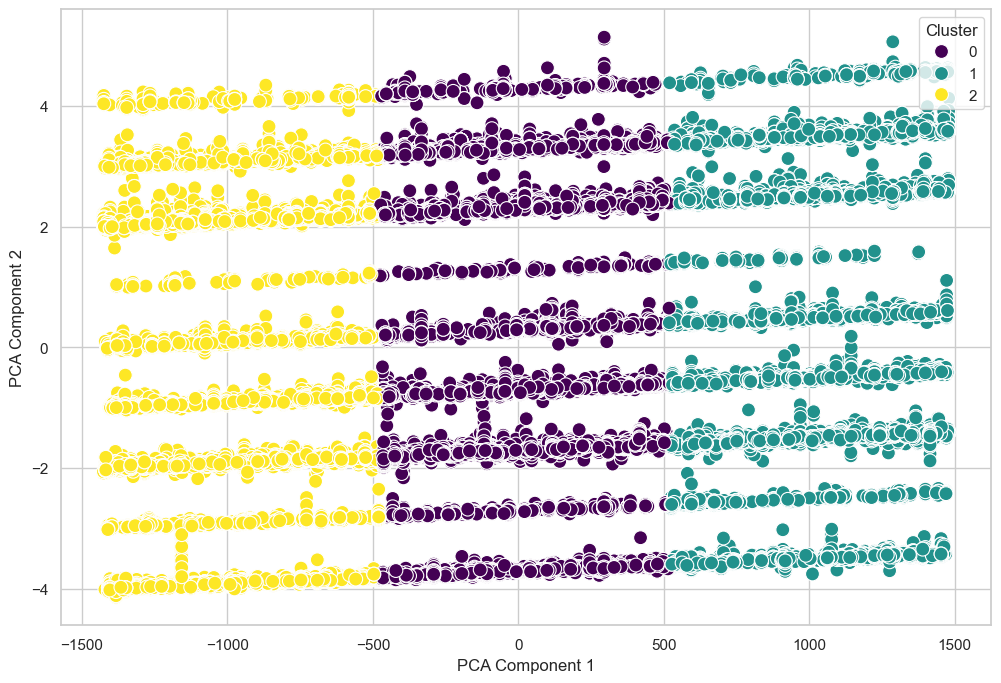

In [62]:
# Step 7: Plotting the clusters after PCA
plt.figure(figsize=(12, 8))
sns.scatterplot(x=Seller_pca[:, 0], y=Seller_pca[:, 1], hue=Seller_cluster_labels, palette='viridis', s=100)
#plt.title('K-Means Clustering of Seller Profiles After PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_17464\3561756841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seller['Cluster'] = Seller_cluster_labels


           seller_id  repeat_purchase     price  freight_value  \
Cluster                                                          
0        1432.338971         0.252543  0.018767       0.043017   
1        2461.438070         0.234888  0.026893      -0.047060   
2         463.949342         0.278684 -0.045323      -0.003592   

         product_category  Shipping_Delivery_Cat  Arrival_Status  \
Cluster                                                            
0                3.628649               0.149643        0.926465   
1                3.521195               0.147756        0.927182   
2                3.939457               0.159902        0.922259   

         seller_state  review_category  
Cluster                                 
0            1.785033         1.620585  
1            1.815603         1.638929  
2            1.819283         1.613571  


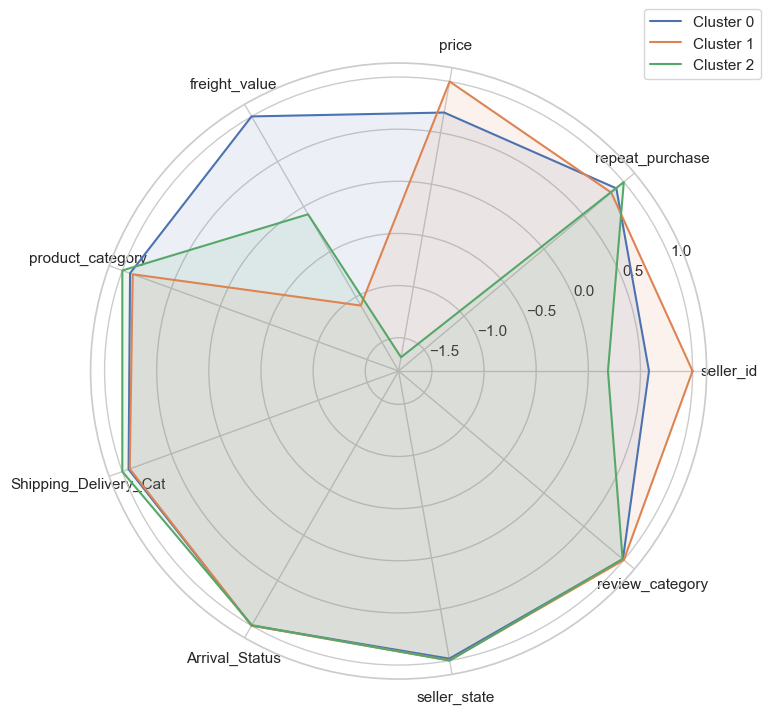

In [63]:
# Radar Chart for Seller Profiles

# Assigning the clusters to each data point Table_RFM 
Seller['Cluster'] = Seller_cluster_labels
Seller_cluster_summary = Seller.groupby('Cluster').mean()
print(Seller_cluster_summary)


# Aggregate the mean values of each feature by cluster
cluster_means = Seller.groupby('Cluster').mean()

# Normalize the aggregated data
cluster_means_normalized = cluster_means / cluster_means.max()
categories = list(cluster_means_normalized.columns)

# Create a list of cluster labels
clusters = list(cluster_means_normalized.index)

# Number of variables we're plotting (the number of features)
num_vars = len(categories)

# Compute the angle of each axis in the plot (divide the plot / number of variables)
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Ensure the plot is a circle

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Plot each cluster
for i, cluster in enumerate(clusters):
    values = cluster_means_normalized.iloc[i].values.flatten().tolist()
    values += values[:1]  # Ensure the plot is a circle
    ax.plot(angles, values, label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)  # Fill in the area for each cluster

# Add labels for each feature/axis
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Draw one axe per variable and add labels
#plt.title('Radar Chart of K-Means Clusters of Seller Profiles')
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

X_train (78797, 2)
y_train (78797,)
X_test (33771, 2)
y_test (33771,)
KNN Accuracy for Seller Profiles: 1.00
KNN Precision Score (Macro-Averaged): 1.00
KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12274
           1       1.00      1.00      1.00     10321
           2       1.00      1.00      1.00     11176

    accuracy                           1.00     33771
   macro avg       1.00      1.00      1.00     33771
weighted avg       1.00      1.00      1.00     33771

KNN Train Accuracy: 1.00
KNN Train Precision Score (Macro-Averaged): 1.00


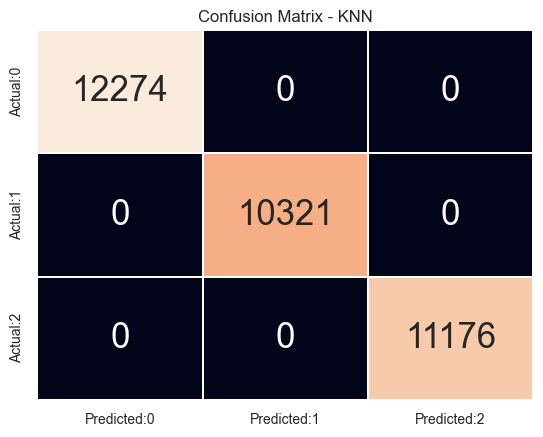

Cross-validation scores are: [1.         1.         0.99995558 1.         1.        ]
Average performance is: 100.0 +/- 0.0 %


In [66]:
# Classification for Seller Profiles

# Step 1: Prepare the data
X = Seller_pca  # PCA-transformed features
y = Seller_cluster_labels  # Cluster labels from K-Means

# Step 2: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# check the dimensions of the train & test subset using 'shape'
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)



# Step 3: Train the KNN classifier
knn_Seller = KNeighborsClassifier(n_neighbors=5)  
knn_Seller.fit(X_train, y_train)


# KNN Evaluation for Test
y_pred_knn_Seller_test = knn_Seller.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_knn_Seller_test)
test_precision = precision_score(y_test, y_pred_knn_Seller_test, average='macro')  # You can change 'macro' to 'micro' or 'weighted'
print(f"KNN Accuracy for Seller Profiles: {test_accuracy:.2f}")
print(f"KNN Precision Score (Macro-Averaged): {test_precision:.2f}")
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn_Seller_test))


# KNN Evaluation for Train
y_pred_knn_Seller_train = knn_Seller.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_knn_Seller_train)
train_precision = precision_score(y_train, y_pred_knn_Seller_train, average='macro')
print(f"KNN Train Accuracy: {train_accuracy:.2f}")
print(f"KNN Train Precision Score (Macro-Averaged): {train_precision:.2f}")


# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn_Seller_test)
conf_matrix = pd.DataFrame(data = cm_knn, columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title("Confusion Matrix - KNN")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Use K-fold cross-validation to compute the mean accuracy
k=5
cv_scores = cross_val_score(knn_Seller, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')


# # Optimized Silhouette Score
# silhouette_avg_Seller = silhouette_score(X_test, y_pred_knn_Seller_test)
# print(f"Optimized Silhouette Score: {silhouette_avg_Seller:.3f}")

XGBoost Accuracy for Seller Profile: 1.00
XGBoost Precision Score (Macro-Averaged): 1.00
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12274
           1       1.00      1.00      1.00     10321
           2       1.00      1.00      1.00     11176

    accuracy                           1.00     33771
   macro avg       1.00      1.00      1.00     33771
weighted avg       1.00      1.00      1.00     33771

XGBoost Train Accuracy: 1.00
XGBoost Train Precision Score (Macro-Averaged): 1.00


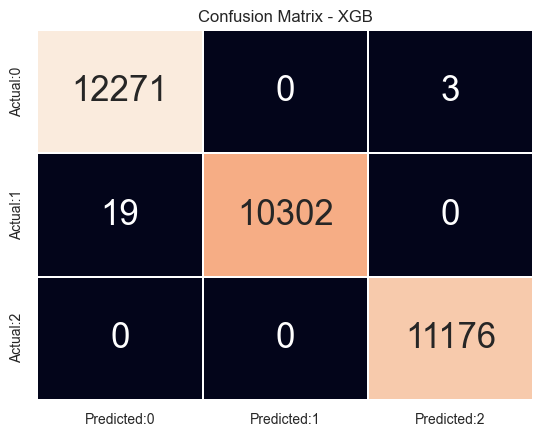

Cross-validation scores are: [0.99937816 0.99911166 0.99897841 0.99893395 0.99902279]
Average performance is: 99.9 +/- 0.0 %


In [65]:
# XGB Classifier
# Initialize and train
xgb_Seller = XGBClassifier(random_state=42)
xgb_Seller.fit(X_train, y_train)


# XGB Evaluation for Test
y_pred_xgb_Seller_test = xgb_Seller.predict(X_test)
xgb_Seller_test_accuracy = accuracy_score(y_test, y_pred_xgb_Seller_test)
xgb_Seller_test_precision = precision_score(y_test, y_pred_xgb_Seller_test, average='macro')  # You can change 'macro' to 'micro' or 'weighted'
print(f"XGBoost Accuracy for Seller Profile: {xgb_Seller_test_accuracy:.2f}")
print(f"XGBoost Precision Score (Macro-Averaged): {xgb_Seller_test_precision:.2f}")
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb_Seller_test))


# XGB Evaluation for Train
y_pred_xgb_Seller_train = xgb_Seller.predict(X_train)
xgb_Seller_train_accuracy = accuracy_score(y_train, y_pred_xgb_Seller_train)
xgb_Seller_train_precision = precision_score(y_train, y_pred_xgb_Seller_train, average='macro')
print(f"XGBoost Train Accuracy: {xgb_Seller_train_accuracy:.2f}")
print(f"XGBoost Train Precision Score (Macro-Averaged): {xgb_Seller_train_precision:.2f}")


# Confusion Matrix for XGBoost
cm_xgb_Seller = confusion_matrix(y_test, y_pred_xgb_Seller_test)
conf_matrix = pd.DataFrame(data = cm_xgb_Seller, columns = ['Predicted:0','Predicted:1','Predicted:2'], index = ['Actual:0','Actual:1','Actual:2'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.title("Confusion Matrix - XGB")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()


# Use 5-fold cross-validation to compute the mean accuracy
k=5
xgb_Seller_cv_scores = cross_val_score(xgb_Seller, X, y, cv=k)
print('Cross-validation scores are:', xgb_Seller_cv_scores)

# Compute the average of the accuracies and its error
avg = sum(xgb_Seller_cv_scores)/len(xgb_Seller_cv_scores)
sd = sqrt(sum((xgb_Seller_cv_scores-avg)**2)/(len(xgb_Seller_cv_scores)-1))
print('Average performance is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')


# # Optimized Silhouette Score
# silhouette_avg_xgb_Seller = silhouette_score(X_test, y_pred_xgb_Seller_test)
# print(f"Optimized Silhouette Score: {silhouette_avg_xgb_Seller:.3f}")  